In [66]:
%load_ext autoreload
%autoreload 2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
pd.options.mode.chained_assignment = None
from glob import glob

import sys
sys.path.append('../python')
from functions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
def fiducial_cuts(df):
    df = df[df.g < 20.2] # reduces streaking 
    df = df[(0.5 <= df['b-r']) & (df['b-r'] <= 1)] # cold stellar streams in particular
    df = df[(np.abs(df['μ_ϕcosλ']) > 2) | (np.abs(df['μ_λ']) > 2)] # exclude stars near 0 proper motion
    return df

# Figure 1

In [ ]:
df_fullpatch = load_file()

In [ ]:
fig = plt.figure(figsize=(13,12.5), dpi=300, tight_layout=True)

cmap = 'Greys'
bins_0 = (np.linspace(-15,15,100), np.linspace(-15,15,100))
bins_1 = (np.linspace(-20,10,100), np.linspace(-20,10,100))
bins_2 = (np.linspace(0,3,100),np.linspace(9,20.2,100))

df = df_fullpatch

ax = fig.add_subplot(331)
h = ax.hist2d(df['ϕ'], df['λ'], cmap=cmap, cmin=1, vmax=250, bins=bins_0)
ax.set_xlabel(r'$\phi~[^\circ]$',fontsize=20)
ax.set_ylabel(r'$\lambda~[^\circ]$',fontsize=20)
ax.set_xlim(-15,15);
ax.set_ylim(-15,15);
c = fig.colorbar(h[3], ax=ax)
c.ax.set_title('Counts', fontsize=12);

ax = fig.add_subplot(332)
h = ax.hist2d(df['μ_ϕcosλ'], df['μ_λ'], cmap=cmap, cmin=1, bins=bins_1)
ax.set_xlim(-20,10)
ax.set_ylim(-20,10)
ax.set_xlabel(r'$\mu_\phi^*$ [mas/yr]',fontsize=20)
ax.set_ylabel(r'$\mu_\lambda$ [mas/yr]',fontsize=20)
c = fig.colorbar(h[3], ax=ax)
c.ax.set_title('Counts', fontsize=12);
ax.set_title('Full Gaia Patch', fontsize=25, pad=20)

ax = fig.add_subplot(333)
h = ax.hist2d(df['b-r'], df['g'], cmap=cmap, cmin=1, bins=bins_2)
ax.set_xlabel(r'$b-r$',fontsize=20)
ax.set_ylabel(r'$g$',fontsize=20)
ax.set_xlim(0,3)
ax.invert_yaxis()
c = fig.colorbar(h[3], ax=ax)
c.ax.set_title('Counts', fontsize=12);

df = fiducial_cuts(df)

ax = fig.add_subplot(334)
h = ax.hist2d(df['ϕ'], df['λ'], cmap=cmap, cmin=1, bins=bins_0)
ax.set_xlabel(r'$\phi~[^\circ]$',fontsize=20)
ax.set_ylabel(r'$\lambda~[^\circ]$',fontsize=20)
ax.set_xlim(-15,15);
ax.set_ylim(-15,15);
c = fig.colorbar(h[3], ax=ax)
c.ax.set_title('Counts', fontsize=12);

ax = fig.add_subplot(335)
h = ax.hist2d(df['μ_ϕcosλ'], df['μ_λ'], cmap=cmap, cmin=1, bins=bins_1)
ax.set_xlim(-20,10)
ax.set_ylim(-20,10)
ax.set_xlabel(r'$\mu_\phi^*$ [mas/yr]',fontsize=20)
ax.set_ylabel(r'$\mu_\lambda$ [mas/yr]',fontsize=20)
c = fig.colorbar(h[3], ax=ax)
c.ax.set_title('Counts', fontsize=12);
ax.set_title('After Fiducial Cuts', fontsize=25, pad=20)

ax = fig.add_subplot(336)
h = ax.hist2d(df['b-r'], df['g'], cmap=cmap, cmin=1, bins=bins_2)
ax.set_xlabel(r'$b-r$',fontsize=20)
ax.set_ylabel(r'$g$',fontsize=20)
ax.set_xlim(0,3)
ax.set_ylim(9,20.2)
ax.invert_yaxis()
c = fig.colorbar(h[3], ax=ax)
c.ax.set_title('Counts', fontsize=12);

ax = fig.add_subplot(337)
h = ax.hist2d(df[df.stream]['ϕ'], df[df.stream]['λ'], cmap='Reds', bins=bins_0, cmin=1)
ax.set_xlabel(r'$\phi~[^\circ]$',fontsize=20)
ax.set_ylabel(r'$\lambda~[^\circ]$',fontsize=20)
ax.set_xlim(-15,15);
ax.set_ylim(-15,15);
c = fig.colorbar(h[3], ax=ax)
c.ax.set_title('Counts', fontsize=12);

ax = fig.add_subplot(338)
h = ax.hist2d(df[df.stream]['μ_ϕcosλ'], df[df.stream]['μ_λ'], cmap='Reds', cmin=1, bins=bins_1)
ax.set_xlim(-20,10)
ax.set_ylim(-20,10)
ax.set_xlabel(r'$\mu_\phi^*$ [mas/yr]',fontsize=20)
ax.set_ylabel(r'$\mu_\lambda$ [mas/yr]',fontsize=20)
c = fig.colorbar(h[3], ax=ax)
c.ax.set_title('Counts', fontsize=12);
ax.set_title('Labeled Stream Stars After Fiducial Cuts', fontsize=25, pad=20)

ax = fig.add_subplot(339)
h = ax.hist2d(df[df.stream]['b-r'], df[df.stream]['g'], cmap='Reds', cmin=1, bins=bins_2)
ax.set_xlabel(r'$b-r$',fontsize=20)
ax.set_ylabel(r'$g$',fontsize=20)
ax.set_xlim(0,3)
ax.set_ylim(9,20.2)
ax.invert_yaxis()
c = fig.colorbar(h[3], ax=ax);
c.ax.set_title('Counts', fontsize=12);

plt.savefig(os.path.join("../plots/input_variables.pdf"))

# Figure 3

In [ ]:
df_slice = signal_sideband(df, save_folder="../plots")

# Figure 4

In [ ]:
all_gd1_stars = []
all_cwola_stars = []
n_top_stars = 250

# files = sorted(glob("../trained_models/new_sr1_sb3_gpu/patches/patch*/df_test.h5")) # default
files = sorted(glob("../trained_models/default_scan/patches/patch*/df_test.h5"))
# files = sorted(glob("../trained_models/train_after_cuts/patches/patch*/df_test.h5"))

for file in tqdm(files): # use all files to create stream stars
    test = pd.read_hdf(file)
    test = fiducial_cuts(test)
    all_gd1_stars.append(test[test.stream])    

for file in files:
    test = pd.read_hdf(file)
    test = fiducial_cuts(test)
    patch_top_stars = test.sort_values('nn_score',ascending=False)[:n_top_stars]
    all_cwola_stars.append(patch_top_stars)
    
# ### optional: add mu_phi scan stars
# mu_phi_files = sorted(glob("../trained_models/scan_over_mu_phi/patches/patch*/df_test.h5"))
# for file in mu_phi_files:
#     test = pd.read_hdf(file)
#     test = fiducial_cuts(test)
#     patch_top_stars = test.sort_values('nn_score',ascending=False)[:n_top_stars]
#     all_cwola_stars.append(patch_top_stars)
    
all_gd1_stars = pd.concat([df for df in all_gd1_stars])
all_cwola_stars = pd.concat([df for df in all_cwola_stars])

all_gd1_stars['α'] = all_gd1_stars['α']-360
all_cwola_stars['α'] = all_cwola_stars['α']-360
    
markersize = 5
plt.figure(dpi=200, figsize=(10,4))
plt.scatter(all_gd1_stars.α_wrapped - 360, all_gd1_stars.δ, marker='.', s=markersize, 
            color="lightgray", label="GD-1")
plt.scatter(all_cwola_stars[all_cwola_stars.stream == False].α_wrapped - 360, all_cwola_stars[all_cwola_stars.stream == False].δ, marker='.', s=markersize, 
             color='dodgerblue',  label="CWoLa Top Stars (GD-1 Non-Match)")
plt.scatter(all_cwola_stars[all_cwola_stars.stream].α_wrapped - 360, all_cwola_stars[all_cwola_stars.stream].δ, marker='.', s=markersize, 
            color="crimson", label="CWoLa Top Stars (GD-1 Match)")
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r"$\alpha$ [\textdegree]", fontsize=18);
plt.ylabel(r"$\delta$ [\textdegree]", fontsize=18);
# plt.xlim(120,220);
plt.xlim(-241,-135);
plt.ylim(-10,65);

print("\n{:,} true GD-1 stars pass fiducial cuts.".format(all_gd1_stars.shape[0]))
print("{:,} stars are identified by CWoLa, of which {:,} belong to GD-1.".format(all_cwola_stars.shape[0], len(all_cwola_stars[all_cwola_stars.stream])))

print("\nPurity = {:.0f}% in top CWoLa-identified stars".format(100*len(all_cwola_stars[all_cwola_stars.stream])/len(all_cwola_stars)))
print("Completeness = {:.0f}% vs. all of GD-1".format(100*len(all_cwola_stars[all_cwola_stars.stream])/len(all_gd1_stars)))

markersize = 5
fig, axs = plt.subplots(nrows=1, ncols=2, dpi=200, figsize=(10,4))

ax = axs[0]
ax.scatter(all_gd1_stars['μ_ϕcosλ'], all_gd1_stars.μ_λ, marker='.', s=markersize, 
            color="lightgray", label="GD-1")
ax.scatter(all_cwola_stars[all_cwola_stars.stream==False]['μ_ϕcosλ'], all_cwola_stars[all_cwola_stars.stream==False].μ_λ, marker='.', s=markersize, 
              color='dodgerblue', label="CWoLa Top Stars (Non-Match)")
ax.scatter(all_cwola_stars[all_cwola_stars.stream==True]['μ_ϕcosλ'], all_cwola_stars[all_cwola_stars.stream==True].μ_λ, marker='.', s=markersize, 
             color="crimson", label="CWoLa Top Stars (Match)")
ax.set_xlabel(r"$\mu_\phi^*$ [mas/year]", fontsize=18);
ax.set_ylabel(r"$\mu_\lambda$ [mas/year]", fontsize=18);
ax.set_xlim(-20,15);
ax.set_ylim(-30,5);

ax = axs[1]
ax.scatter(all_gd1_stars['b-r'], all_gd1_stars.g, marker='.', s=markersize, 
            color="lightgray", label="GD-1")
ax.scatter(all_cwola_stars[all_cwola_stars.stream==False]['b-r'], all_cwola_stars[all_cwola_stars.stream==False].g, marker='.', s=markersize, 
            color='dodgerblue', label="CWoLa Top Stars (Non-Match)")
ax.scatter(all_cwola_stars[all_cwola_stars.stream==True]['b-r'], all_cwola_stars[all_cwola_stars.stream==True].g, marker='.', s=markersize, 
            color='crimson', label="CWoLa Top Stars (Match)")
ax.set_xlabel(r"$b-r$", fontsize=18);
ax.set_ylabel(r"$g$", fontsize=18);
ax.set_xlim(0.25,1.25);
ax.set_ylim(15,21);
ax.invert_yaxis()

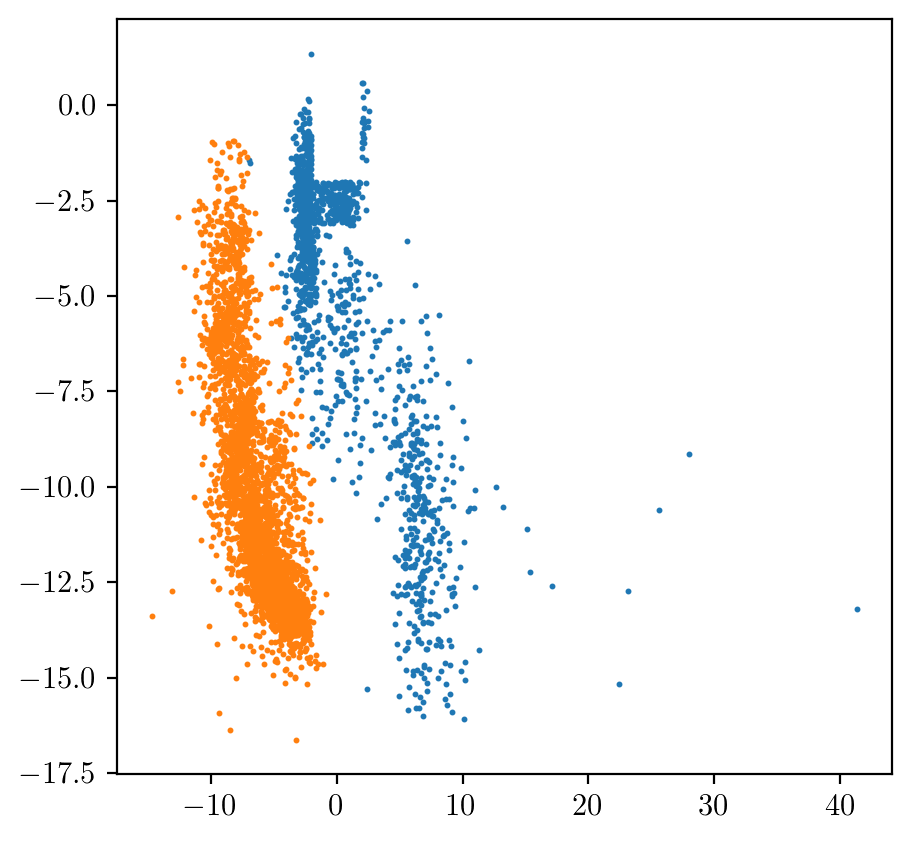

In [139]:
plt.figure(figsize=(5,5), dpi=200)
df = all_cwola_stars
X = np.array(df[['μ_ϕcosλ', 'μ_λ']])

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
plt.scatter(df['μ_ϕcosλ'][kmeans.labels_ == 0], 
            df['μ_λ'][kmeans.labels_ == 0], marker='.', s=markersize);
plt.scatter(df['μ_ϕcosλ'][kmeans.labels_ == 1], 
            df['μ_λ'][kmeans.labels_ == 1], marker='.', s=markersize);
plt.scatter(df['μ_ϕcosλ'][kmeans.labels_ == 2], 
            df['μ_λ'][kmeans.labels_ == 2], marker='.', s=markersize);

In [140]:
### Choose the cluster with the largest number of stars
all_cwola_stars = all_cwola_stars[kmeans.labels_ == np.argmax([np.sum(kmeans.labels_ == 0), np.sum(kmeans.labels_ == 1)])]

### We're gonna want to save a version of this with duplicates included for the patch-by-patch plot
all_cwola_stars_with_duplicates = all_cwola_stars.copy()
all_gd1_stars_with_duplicates = all_gd1_stars.copy()

### Remove duplicates
all_gd1_stars.reset_index(inplace=True)
all_gd1_stars.drop_duplicates(subset = 'index')
all_gd1_stars.drop_duplicates(subset=['α','δ', 'μ_α', 'μ_δ', 'b-r', 'g'], inplace=True)

all_cwola_stars.reset_index(inplace=True)
all_cwola_stars.drop_duplicates(subset = 'index')
all_cwola_stars.drop_duplicates(subset=['α','δ', 'μ_α', 'μ_δ', 'b-r', 'g'], inplace=True)

In [141]:
print("\n{:,} true GD-1 stars pass fiducial cuts.".format(all_gd1_stars.shape[0]))
print("{:,} stars are identified by CWoLa, of which {:,} belong to GD-1.".format(all_cwola_stars.shape[0], len(all_cwola_stars[all_cwola_stars.stream])))

purity = 100*len(all_cwola_stars[all_cwola_stars.stream])/len(all_cwola_stars)
completeness = 100*len(all_cwola_stars[all_cwola_stars.stream])/len(all_gd1_stars)

print("\nPurity = {:.0f}% in top CWoLa-identified stars".format(purity))
print("Completeness = {:.0f}% vs. all of GD-1".format(completeness))


9,021 true GD-1 stars pass fiducial cuts.
3,874 stars are identified by CWoLa, of which 2,755 belong to GD-1.

Purity = 71% in top CWoLa-identified stars
Completeness = 31% vs. all of GD-1


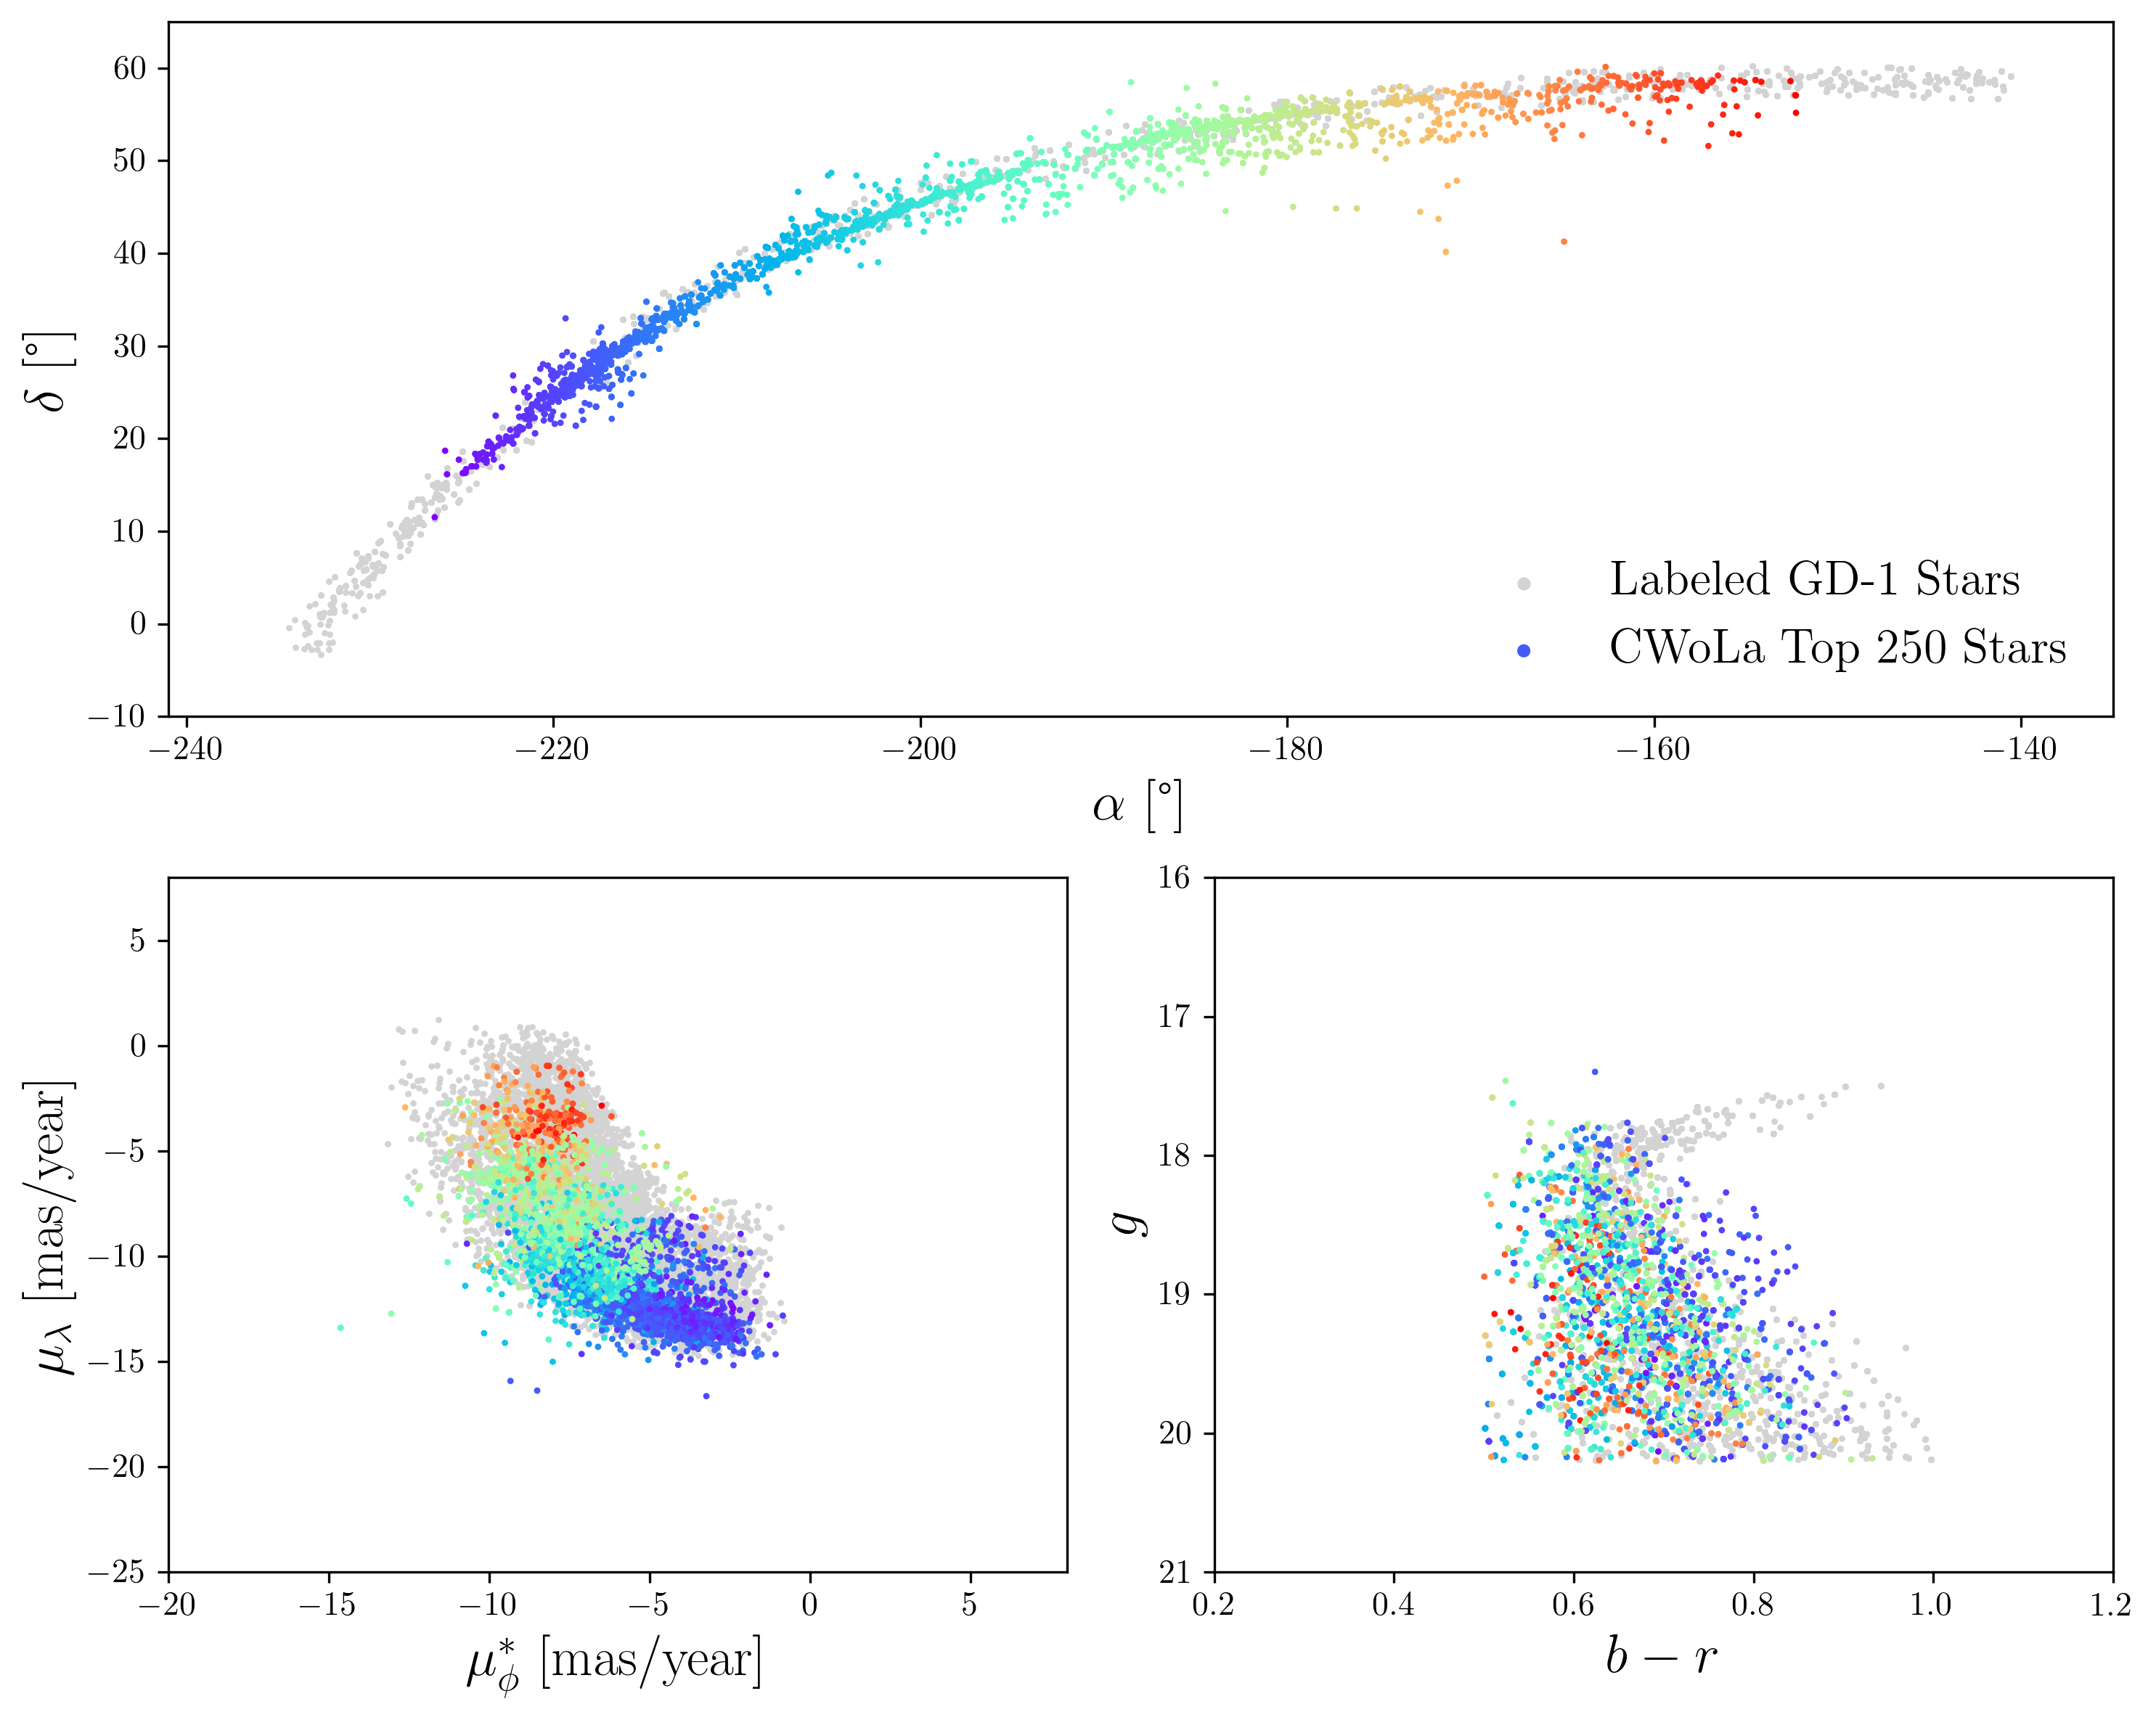

In [142]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(10,8), dpi=300, tight_layout=True)
gs = GridSpec(2,2) # 2 rows, 3 columns

ax1 = fig.add_subplot(gs[0,:]) # Second row, span all columns
ax2 = fig.add_subplot(gs[1,0]) # First row, first column
ax3 = fig.add_subplot(gs[1,1]) # First row, second column

markersize = 5
ax1.scatter(all_gd1_stars.α_wrapped - 360, all_gd1_stars.δ, marker='.', s=markersize, color="lightgray", label="Labeled GD-1 Stars")
ax1.scatter(all_cwola_stars.α_wrapped - 360, all_cwola_stars.δ, marker='.', s=markersize, c=all_cwola_stars.α_wrapped - 360, cmap='rainbow',  
            label="CWoLa Top 250 Stars")
ax1.legend(fontsize=16, frameon=False, markerscale=3)
ax1.set_xlabel(r"$\alpha$ [\textdegree]", fontsize=18);
ax1.set_ylabel(r"$\delta$ [\textdegree]", fontsize=18);
ax1.set_xlim(-241,-135);
ax1.set_ylim(-10,65);

ax2.scatter(all_gd1_stars['μ_ϕcosλ'], all_gd1_stars.μ_λ, marker='.', s=markersize, color="lightgray", label="GD-1")
ax2.scatter(all_cwola_stars['μ_ϕcosλ'], all_cwola_stars.μ_λ, marker='.', s=markersize, 
              c=all_cwola_stars.α_wrapped - 360, cmap='rainbow', label="CWoLa Top Stars")
ax2.set_xlabel(r"$\mu_\phi^*$ [mas/year]", fontsize=18);
ax2.set_ylabel(r"$\mu_\lambda$ [mas/year]", fontsize=18);
ax2.set_xlim(-20,8);
ax2.set_ylim(-25,8);

ax3.scatter(all_gd1_stars['b-r'], all_gd1_stars.g, marker='.', s=markersize, color="lightgray", label="GD-1")
ax3.scatter(all_cwola_stars['b-r'], all_cwola_stars.g, marker='.', s=markersize, 
            c=all_cwola_stars.α_wrapped - 360, cmap='rainbow', label="CWoLa Top Stars")
ax3.set_xlabel(r"$b-r$", fontsize=18);
ax3.set_ylabel(r"$g$", fontsize=18);
ax3.set_xlim(0.2,1.2);
ax3.set_ylim(16,21);
ax3.invert_yaxis()
# plt.savefig('../plots/rainbow.pdf')

# Figure 6

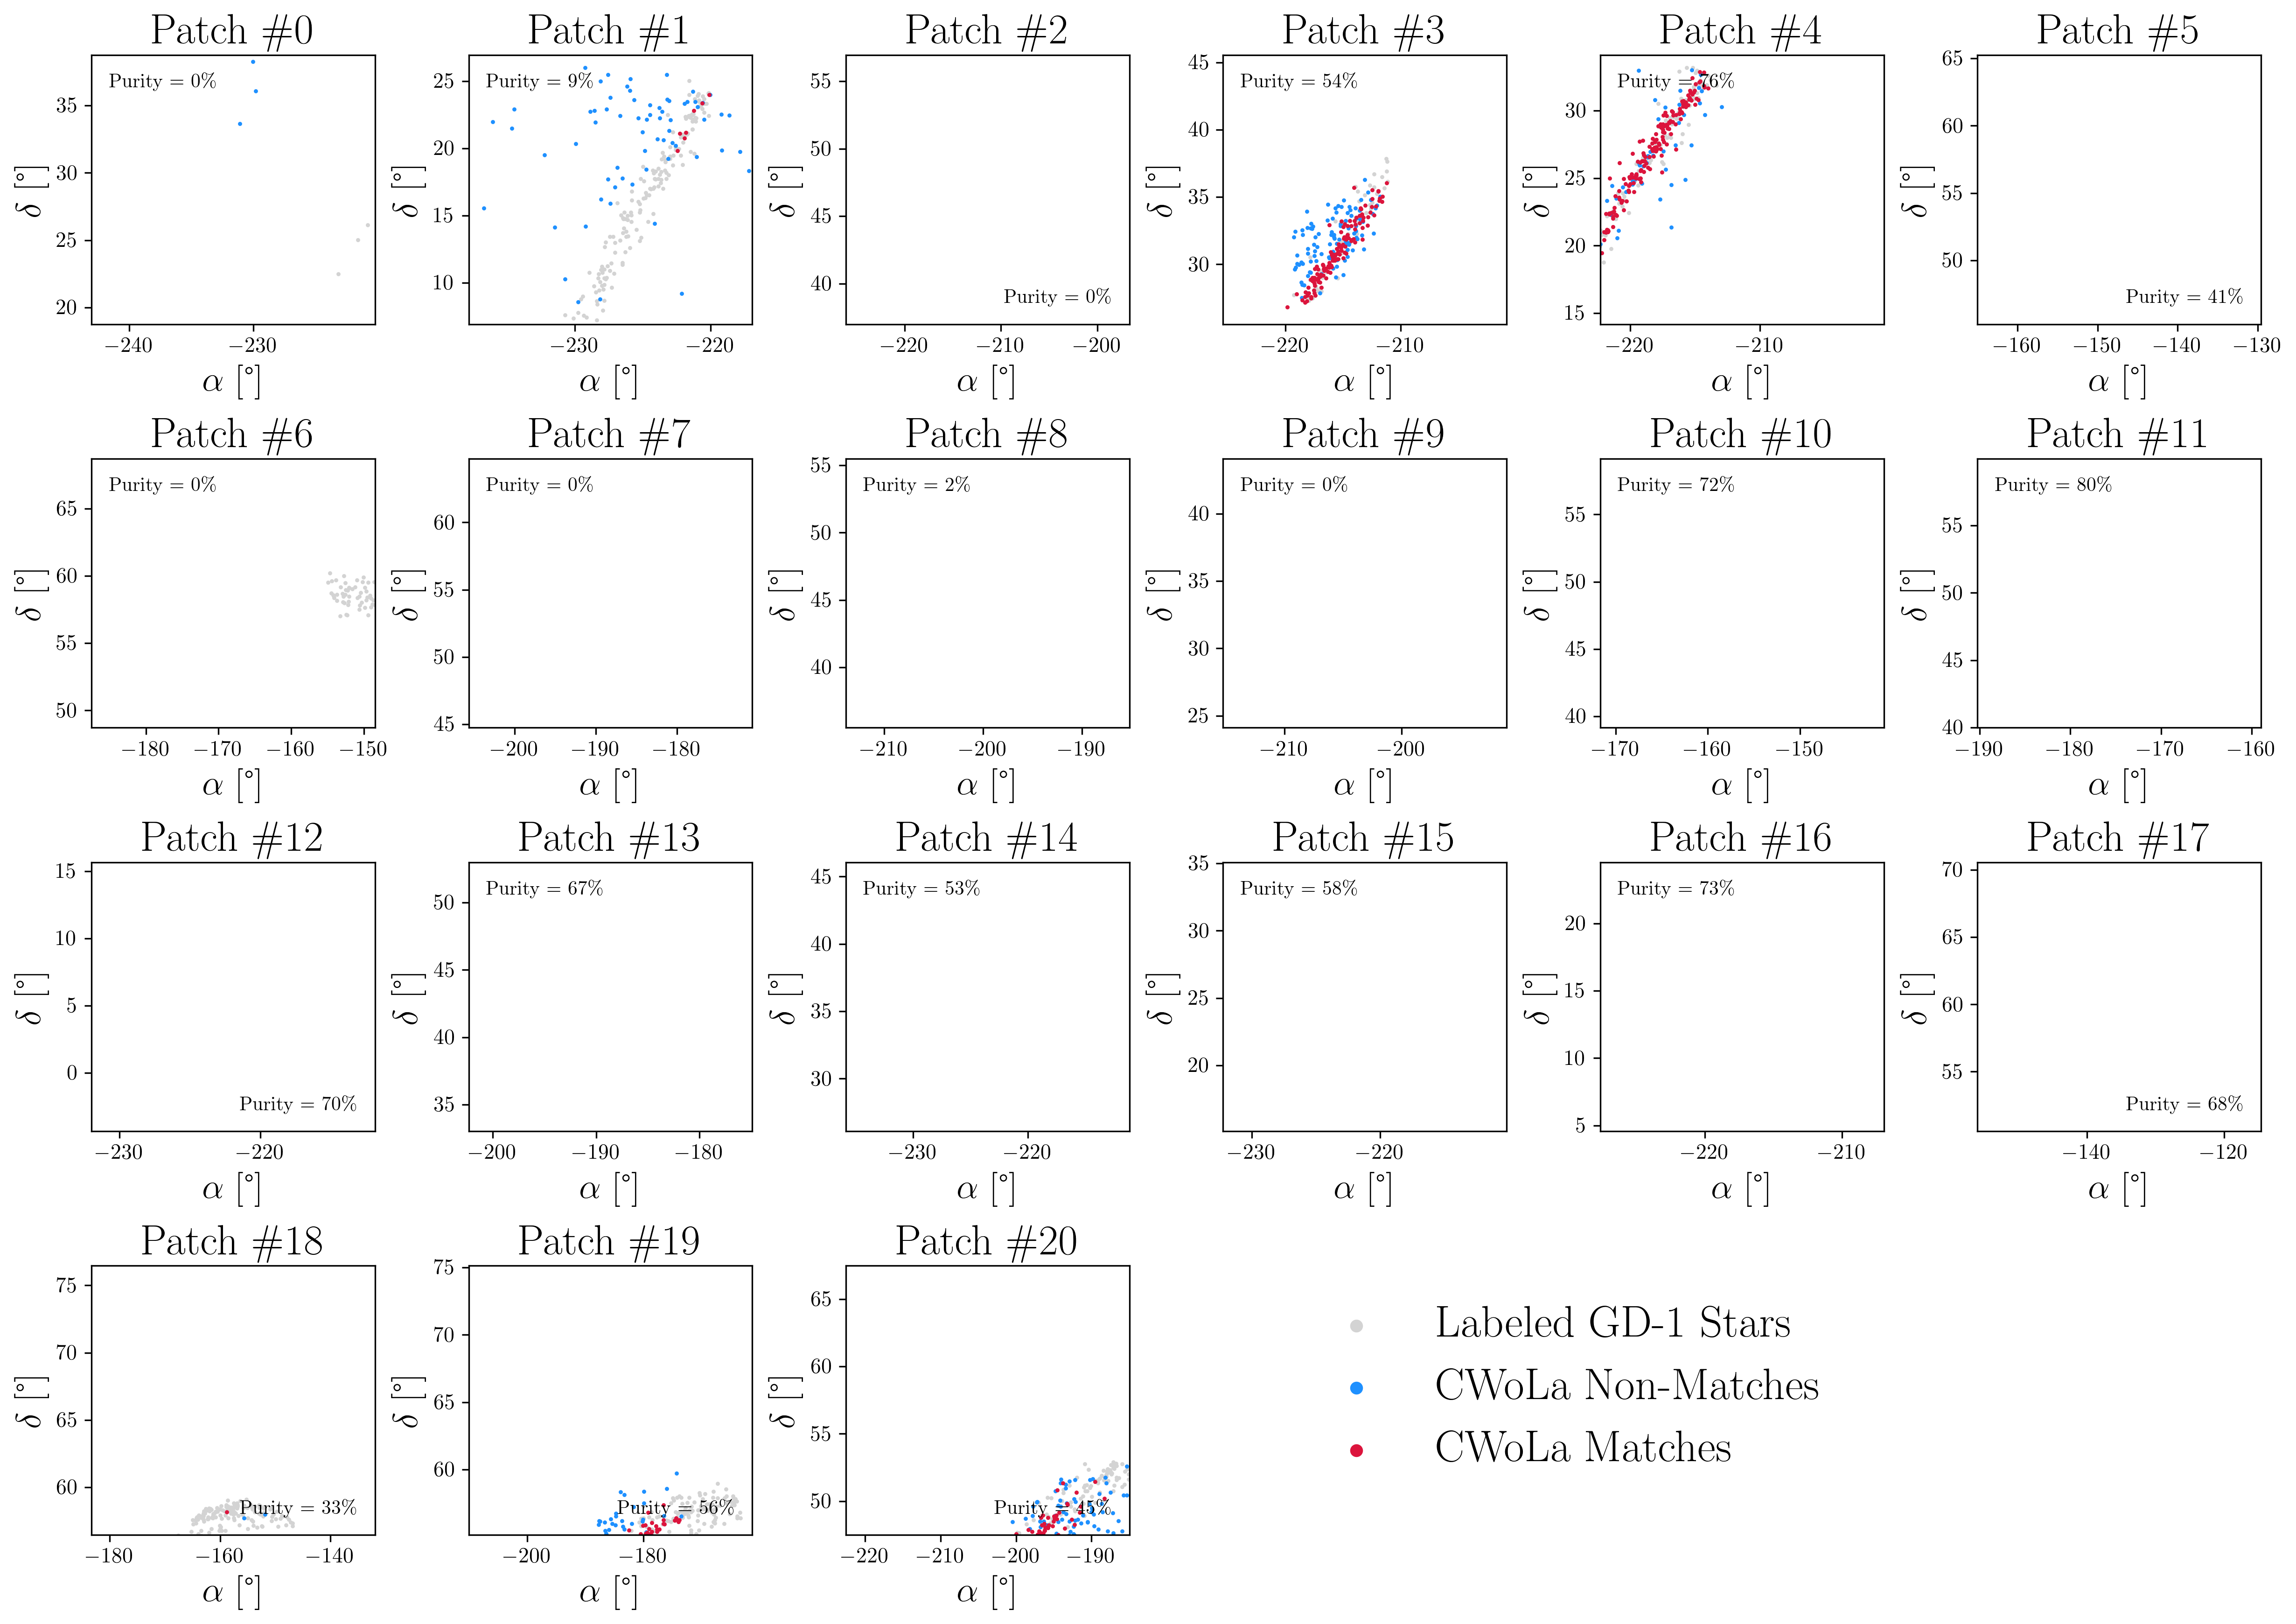

In [82]:
from matplotlib.offsetbox import AnchoredText
α_limits = []
δ_limits = []

for file in files:
    test = pd.read_hdf(file)
    α_min, α_max = np.min(test.α_wrapped - 360), np.max(test.α_wrapped - 360)
    δ_min, δ_max = np.min(test.δ), np.max(test.δ)
    α_limits.append([α_min, α_max])
    δ_limits.append([δ_min, δ_max])
    
fig, axs = plt.subplots(figsize=(20,14), nrows=4, ncols=6, dpi=300, tight_layout=False)
plt.subplots_adjust(wspace = 0.33, hspace=0.5) 

for i, ax in zip(np.arange(21), axs.ravel()):
    stream = all_gd1_stars_with_duplicates[all_gd1_stars_with_duplicates.patch_id == i]
    cwola = all_cwola_stars_with_duplicates[all_cwola_stars_with_duplicates.patch_id == i]
#     print("Patch ",str(i))

    try: 
        purity = 100*len(cwola[cwola.stream])/len(cwola)
        completeness = 100*len(cwola[cwola.stream])/len(stream)    
    except: 
        purity = 0
        completeness = 0
        
#     print("Purity = ",str(purity))
#     print("Completeness = ",str(completeness))
    markersize = 5
    ax.scatter(stream.α_wrapped - 360, stream.δ, marker='.', s=markersize, color="lightgrey", label="Labeled GD-1 Stars")
    ax.scatter(cwola[cwola.stream == False].α_wrapped - 360, cwola[cwola.stream == False].δ, marker='.', s=markersize, color="dodgerblue", label="CWoLa Non-Matches")
    ax.scatter(cwola[cwola.stream].α_wrapped - 360, cwola[cwola.stream].δ, marker='.', s=markersize, color="crimson", label="CWoLa Matches")
    if i == 20: ax.legend(fontsize=23, frameon=False,
              bbox_to_anchor=(1.5, 1.0), markerscale=5,
             )
    ax.set_xlabel(r"$\alpha$ [\textdegree]", fontsize=18);
    ax.set_ylabel(r"$\delta$ [\textdegree]", fontsize=18);
    ax.set_xlim(α_limits[i][0], α_limits[i][1]);
    ax.set_ylim(δ_limits[i][0], δ_limits[i][1]);
    ax.set_title("Patch \#{}".format(i), fontsize=22);
#     ax.text(0.1, 0.9, 'Begin text', horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
    loc = 'upper left'
    if i in [2,5,12,17,18,19,20]: 
        loc = 'lower right'
    anchored_text = AnchoredText("Purity = {:.0f}\%".format(purity), loc=loc, frameon=False)
    ax.add_artist(anchored_text)

    
fig.delaxes(axs[3][3])
fig.delaxes(axs[3][4])
fig.delaxes(axs[3][5])    
# plt.savefig('../plots/patch_by_patch.pdf')

# Figure 7

In [143]:
import astropy.units as u
from gala.coordinates import GD1Koposov10
from astropy.coordinates import SkyCoord

In [144]:
gd1_frame = GD1Koposov10()

### All GD-1 stars
coord_icrs = SkyCoord(ra=(all_gd1_stars['α_wrapped'] - 360)*u.degree, dec=all_gd1_stars.δ*u.degree, frame='icrs')
coord_gd1 = coord_icrs.transform_to(gd1_frame)
all_gd1_stars['ϕ1'] = coord_gd1.phi1.degree
all_gd1_stars['ϕ2'] = coord_gd1.phi2.degree

### CWoLa stars
coord_icrs = SkyCoord(ra=(all_cwola_stars['α_wrapped'] - 360)*u.degree, dec=all_cwola_stars.δ*u.degree, frame='icrs')
coord_gd1 = coord_icrs.transform_to(gd1_frame)
all_cwola_stars['ϕ1'] = coord_gd1.phi1.degree
all_cwola_stars['ϕ2'] = coord_gd1.phi2.degree

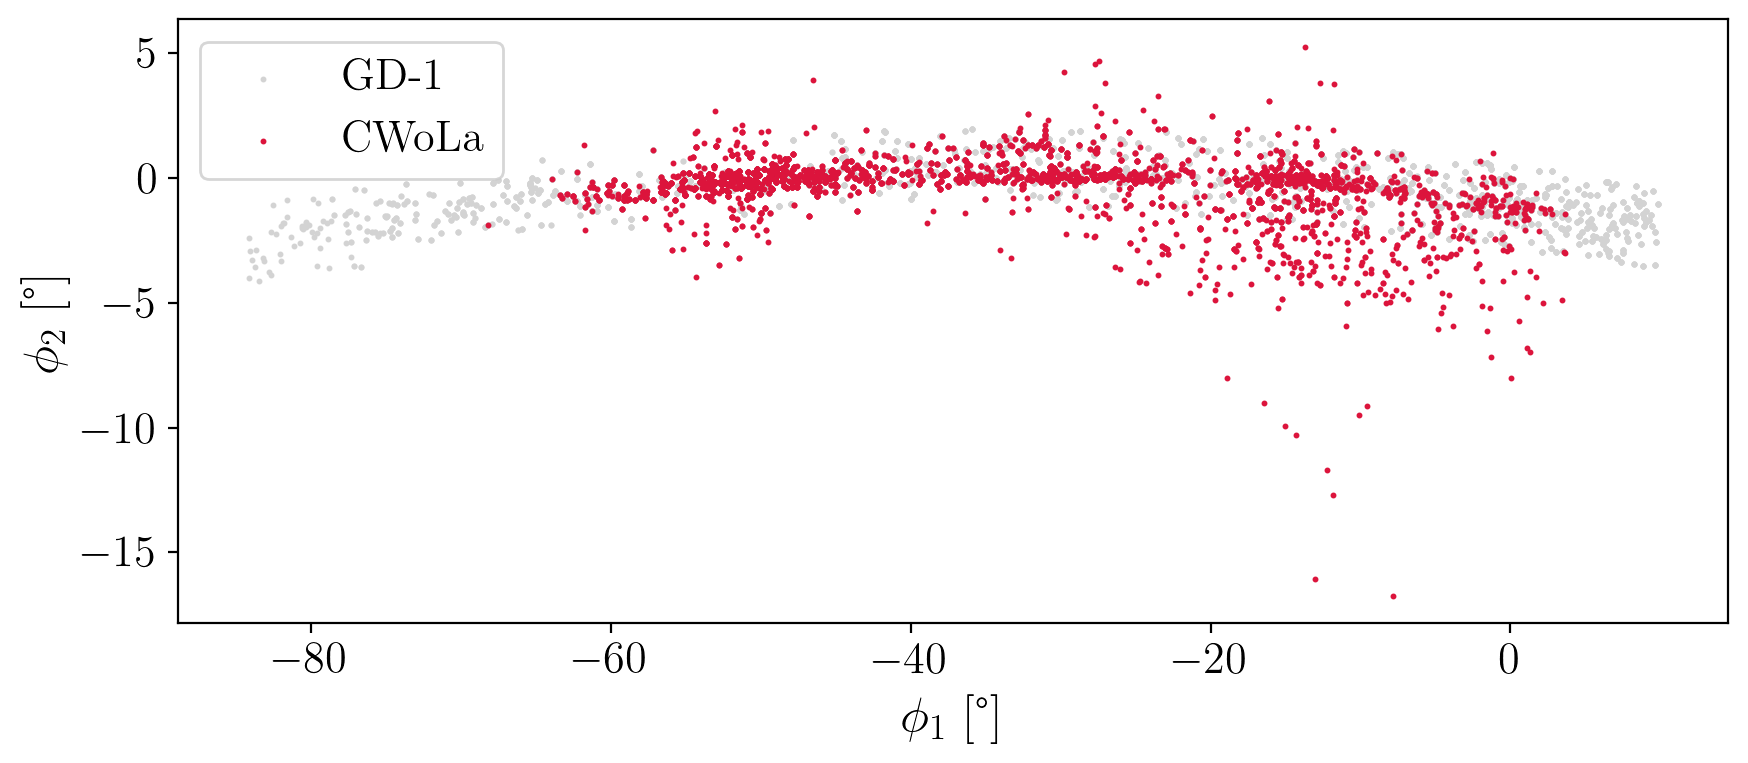

In [145]:
markersize = 5
plt.figure(dpi=200, figsize=(10,4))
plt.scatter(all_gd1_stars['ϕ1'], all_gd1_stars['ϕ2'], marker='.', s=markersize, color="lightgray", label="GD-1")
plt.scatter(all_cwola_stars['ϕ1'], all_cwola_stars['ϕ2'], marker='.', s=markersize, color="crimson", label="CWoLa")
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r"$\phi_1$ [\textdegree]", fontsize=18);
plt.ylabel(r"$\phi_2$ [\textdegree]", fontsize=18);

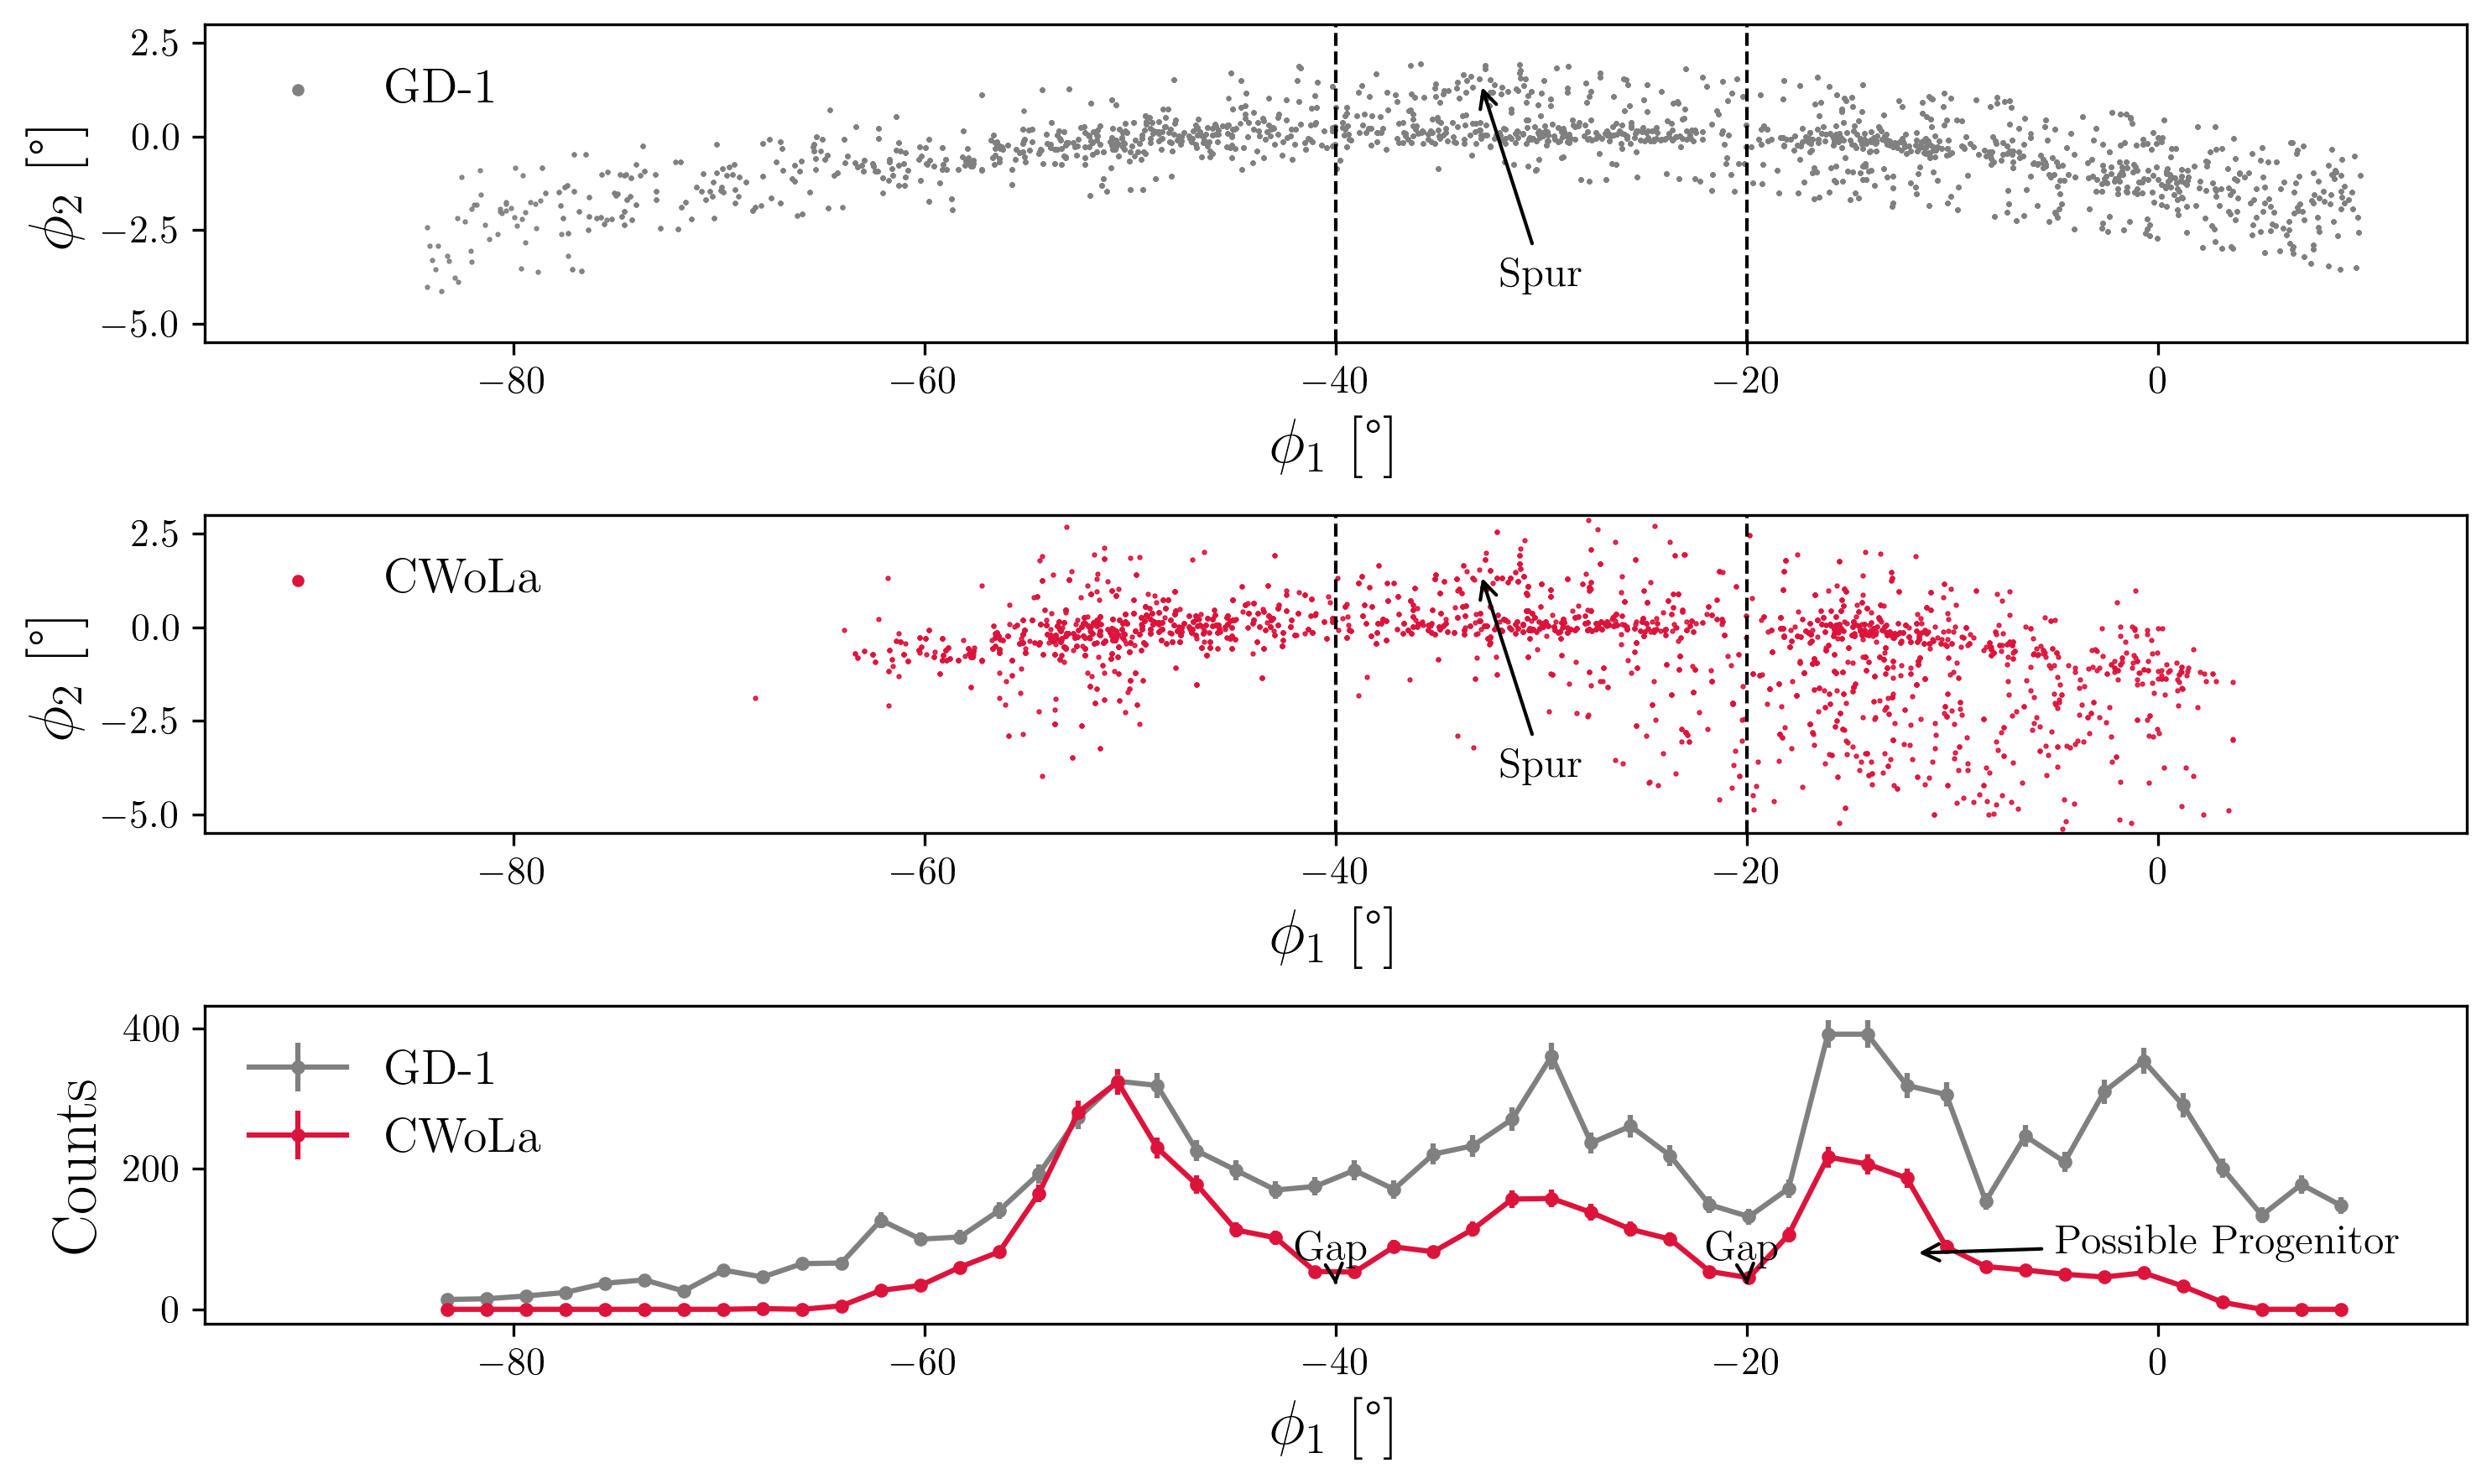

In [146]:
markersize = 1
fig, axs = plt.subplots(nrows=3, ncols=1, dpi=300, figsize=(10,6), tight_layout=True)

ax = axs[0]
ax.scatter(all_gd1_stars['ϕ1'], all_gd1_stars['ϕ2'], marker='.', s=markersize, color="gray", label="GD-1")
ax.legend(fontsize=14, frameon=False, markerscale=5)
ax.set_xlabel(r"$\phi_1$ [\textdegree]", fontsize=18);
ax.set_ylabel(r"$\phi_2$ [\textdegree]", fontsize=18);
ax.axvline(-40,c='k',linestyle='dashed',lw=1)
ax.axvline(-20,c='k',linestyle='dashed',lw=1)
# ax.axvline(-14,c='k',lw=1)
ax.annotate('Spur', fontsize=12, xy=(-33,1.5), xytext=(-32,-4), arrowprops=dict(arrowstyle='->'))
# ax.arrow(-30,-2,-2.7,2.5,width=0.1,color='k')
# ax.text(-31,-2.8,'Spur', fontsize=14)
ax.set_ylim(-5.5,3)
ax.set_xlim(-95,15)
# ax.text(-14+0.5,-5,'``Blob", or possible progenitor',rotation=0, fontsize=14)

ax = axs[1]
ax.scatter(all_cwola_stars['ϕ1'], all_cwola_stars['ϕ2'], marker='.', s=markersize, color="crimson", label="CWoLa")
ax.legend(fontsize=14, frameon=False, markerscale=5)
ax.set_xlabel(r"$\phi_1$ [\textdegree]", fontsize=18);
ax.set_ylabel(r"$\phi_2$ [\textdegree]", fontsize=18);
ax.set_ylim(-5.5,3)
ax.set_xlim(-95,15)
ax.axvline(-40,c='k',linestyle="dashed",lw=1)
ax.axvline(-20,c='k',linestyle="dashed",lw=1)

# ax.arrow(-30,-3,-2.5,3.7,width=0.1,color='k')
ax.annotate('Spur', fontsize=12, xy=(-33,1.5), xytext=(-32,-4), arrowprops=dict(arrowstyle='->'))
# ax.arrow(-30,-3.5,-2,2,width=0.1,color='k', head_width = 1, head_length = 1)

# ax.text(-32,-3.8,'Spur', fontsize=14)
# ax.axvline(-14,c='k',lw=1)

ax = axs[2]
ax.set_xlabel(r"$\phi_1$ [\textdegree]", fontsize=18);
ax.set_xlim(-95,15);

bins = np.linspace(np.min(all_gd1_stars['ϕ1']),np.max(all_gd1_stars['ϕ1']),50)
counts_gd1, _   = np.histogram(all_gd1_stars['ϕ1'], bins=bins) 
counts_cwola, _ = np.histogram(all_cwola_stars['ϕ1'], bins=bins) 
ax.errorbar(0.5*(bins[1:]+bins[:-1]),counts_gd1, yerr=np.sqrt(counts_gd1),  marker='.',c='gray', label='GD-1')
ax.errorbar(0.5*(bins[1:]+bins[:-1]),counts_cwola, yerr=np.sqrt(counts_cwola), marker='.', c='crimson', label='CWoLa')
ax.legend(loc='upper left', frameon=False, fontsize=14);
# ax.axvline(-14,c='k',lw=1)
# ax.axvline(-20,c='k',linestyle="dashed",lw=1)
# ax.axvline(-40,c='k',linestyle="dashed",lw=1)
ax.annotate('Gap', fontsize=12, xy=(-40,35), xytext=(-42,70), arrowprops=dict(arrowstyle='->'))
ax.annotate('Gap', fontsize=12, xy=(-20,35), xytext=(-22,70), arrowprops=dict(arrowstyle='->'))
ax.annotate('Possible Progenitor', fontsize=12, xy=(-12,80), xytext=(-5,80), arrowprops=dict(arrowstyle='->'))

# ax.text(-40-2.5,80,'Gap',rotation=0, fontsize=14)
# ax.text(-20-2.5,80,'Gap',rotation=0, fontsize=14)
# ax.arrow(-40,75,0,-30,width=0.1,color='k', head_width = 1, head_length = 5)
# ax.arrow(-20,75,0,-30,width=0.1,color='k', head_width = 1, head_length = 5)
ax.set_ylabel('Counts', fontsize=18);
# ax.set_ylim(0,80);
# plt.savefig("../plots/stream_frame.pdf")

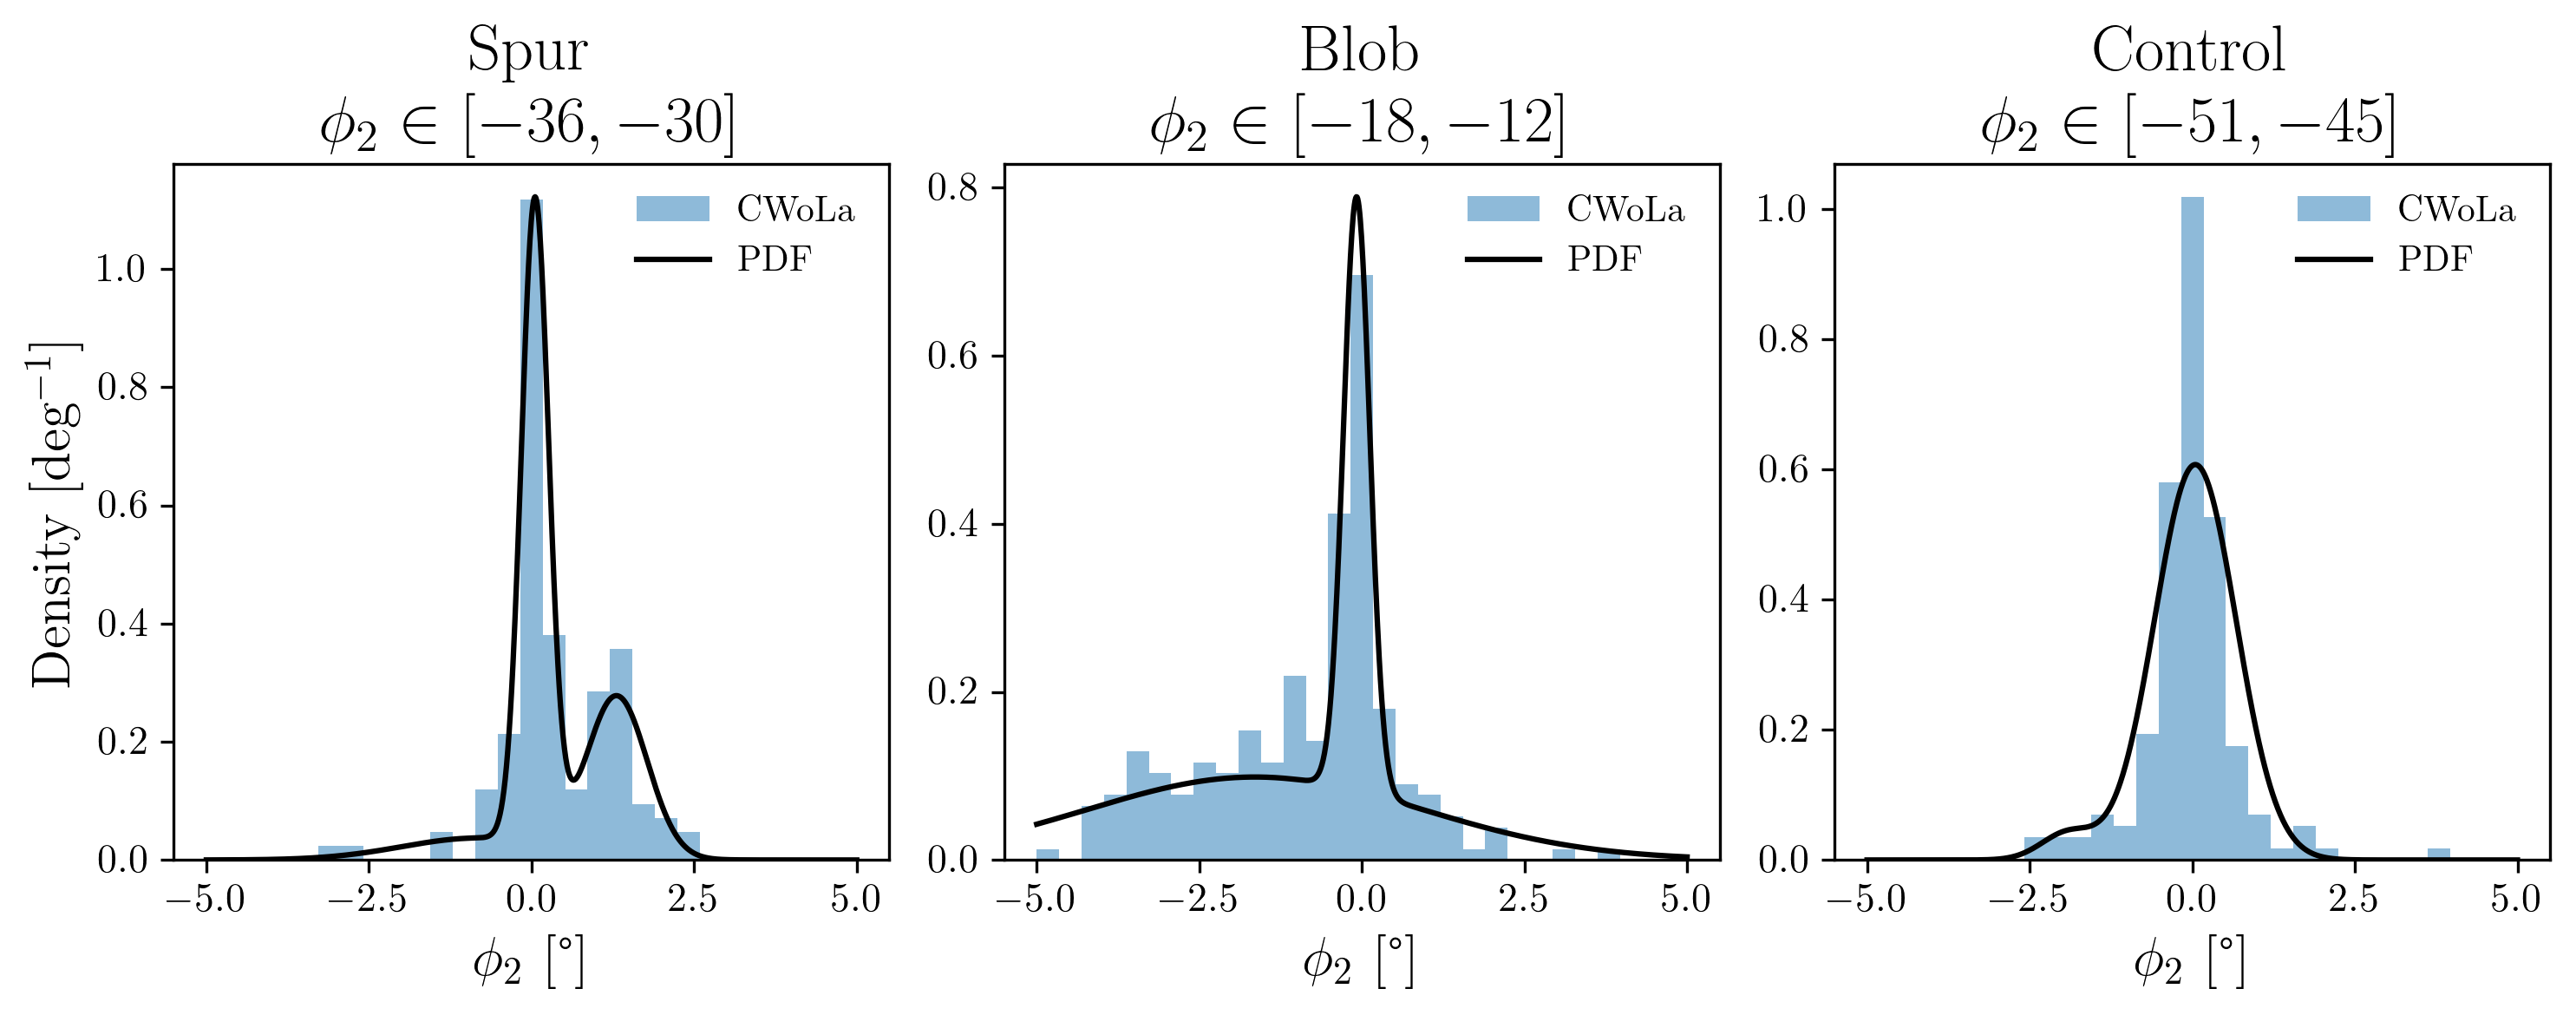

In [130]:
from sklearn.mixture import BayesianGaussianMixture, GaussianMixture

fig, axs = plt.subplots(dpi=300, nrows=1, ncols=3, tight_layout=True, figsize=(10,4))

spur = all_cwola_stars[(-36 <= all_cwola_stars['ϕ1']) & (all_cwola_stars['ϕ1'] <= -30)]
blob = all_cwola_stars[(-18 <= all_cwola_stars['ϕ1']) & (all_cwola_stars['ϕ1'] <= -12)]
control = all_cwola_stars[(-51 <= all_cwola_stars['ϕ1']) & (all_cwola_stars['ϕ1'] <= -45)]

bins = np.linspace(-5,5,30)
ax = axs[0]
ax.hist(spur['ϕ2'],bins=bins, density=True, alpha=0.5, label="CWoLa")
ax.set_title("Spur\n"+r"$\phi_2 \in [-36\textdegree,-30\textdegree]$",fontsize=18);
ax.set_xlabel(r"$\phi_2$ [\textdegree]", fontsize=15);
ax.set_ylabel(r"Density [deg$^{-1}$]", fontsize=15);

X = np.array(spur['ϕ2']).reshape(-1, 1)
gmm = GaussianMixture(n_components=3, 
#                               means_init=np.array([0,1.2]).reshape(-1, 1), 
#                      precisions_init=np.array([.003,.003]).reshape(-1,1,1)
                     ).fit(X)
x = np.linspace(-5, 5, 1000)
logprob = gmm.score_samples(x.reshape(-1, 1))
responsibilities = gmm.predict_proba(x.reshape(-1, 1))
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]
ax.plot(x, pdf, '-k', label="PDF")
# ax.plot(x, pdf_individual, '--k')
ax.legend(frameon=False, fontsize=10)

ax = axs[1]
ax.hist(blob['ϕ2'],bins=np.linspace(-5,5,30), density=True, alpha=0.5, label="CWoLa")
ax.set_title("Blob\n"+r"$\phi_2 \in [-18\textdegree,-12\textdegree]$",fontsize=18);
ax.set_xlabel(r"$\phi_2$ [\textdegree]", fontsize=15);

X = np.array(blob['ϕ2']).reshape(-1, 1)
gmm = GaussianMixture(2, means_init=np.array([0,-1]).reshape(-1, 1)).fit(X)
x = np.linspace(-5, 5, 1000)
logprob = gmm.score_samples(x.reshape(-1, 1))
responsibilities = gmm.predict_proba(x.reshape(-1, 1))
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]
ax.plot(x, pdf, '-k', label="PDF")
ax.legend(frameon=False, fontsize=10)

ax = axs[2]
ax.hist(control['ϕ2'],bins=np.linspace(-5,5,30), density=True, alpha=0.5, label="CWoLa")
ax.set_title("Control\n"+r"$\phi_2\in[-51\textdegree,-45\textdegree]$",fontsize=18);
ax.set_xlabel(r"$\phi_2$ [\textdegree]", fontsize=15);
X = np.array(control['ϕ2']).reshape(-1, 1)
gmm = GaussianMixture(2).fit(X)
x = np.linspace(-5, 5, 1000)
logprob = gmm.score_samples(x.reshape(-1, 1))
responsibilities = gmm.predict_proba(x.reshape(-1, 1))
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]
ax.plot(x, pdf, '-k', label="PDF")
ax.legend(frameon=False, fontsize=10)

# plt.savefig("../plots/gmm_default_scan.pdf")

# Cocoon

[-68.23161163 -65.75382104 -63.27603046 -60.79823987 -58.32044928
 -55.84265869 -53.3648681  -50.88707751 -48.40928692 -45.93149633
 -43.45370575 -40.97591516 -38.49812457 -36.02033398 -33.54254339
 -31.0647528  -28.58696221 -26.10917163 -23.63138104 -21.15359045
 -18.67579986 -16.19800927 -13.72021868 -11.24242809  -8.76463751
  -6.28684692  -3.80905633  -1.33126574   1.14652485   3.62431544]
[[-50.7260109 ]
 [-10.41443164]
 [-29.45347073]]
-0.32184977947685844
1.6328170126075616


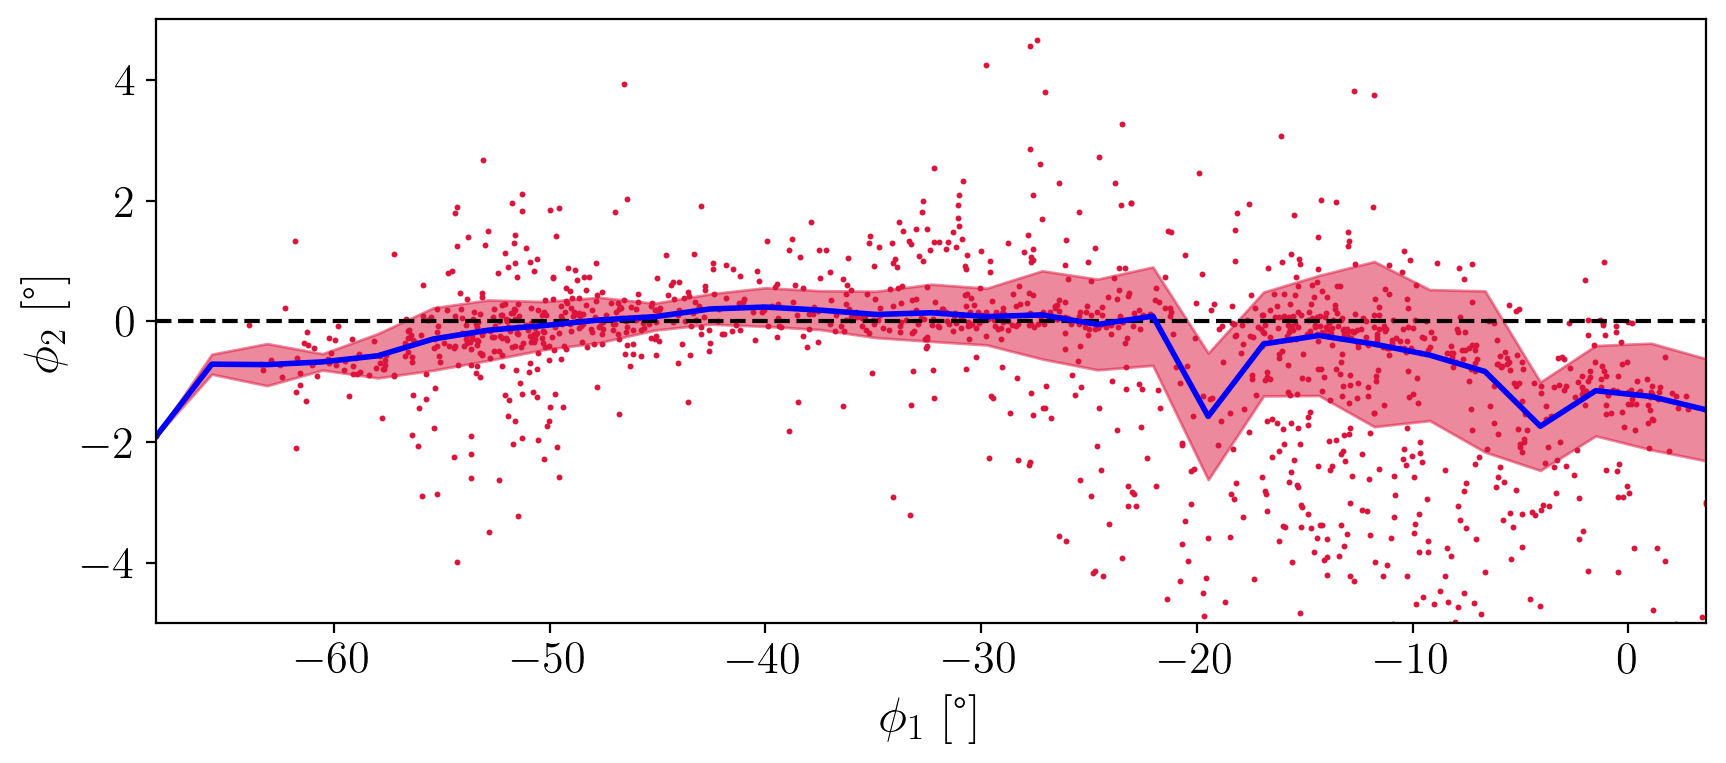

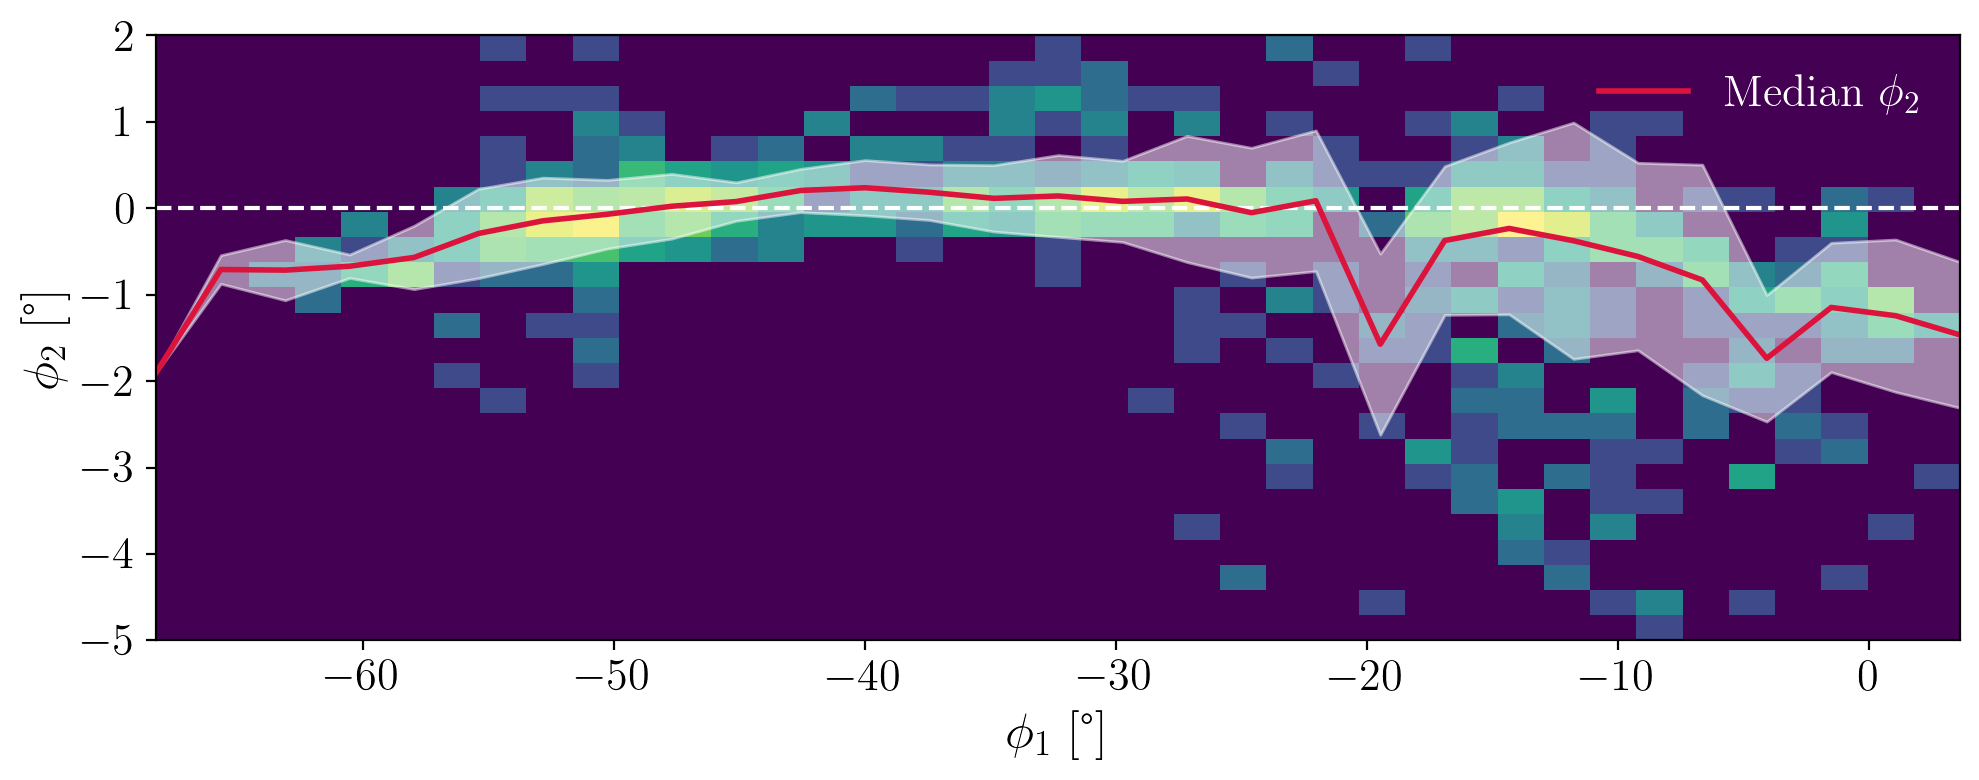

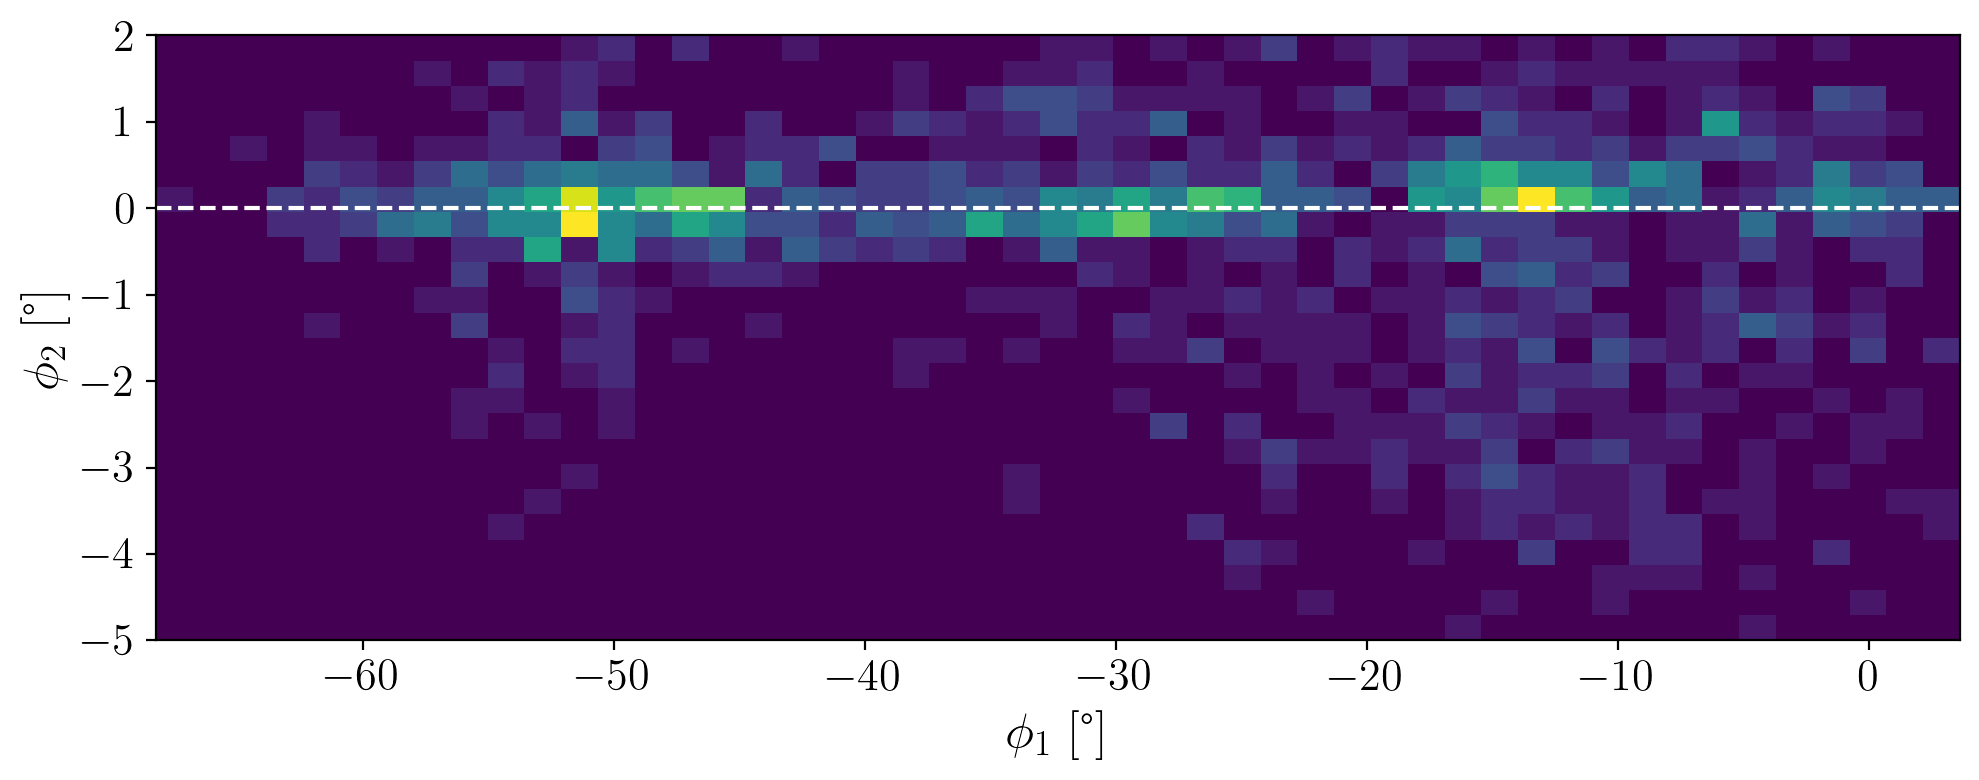

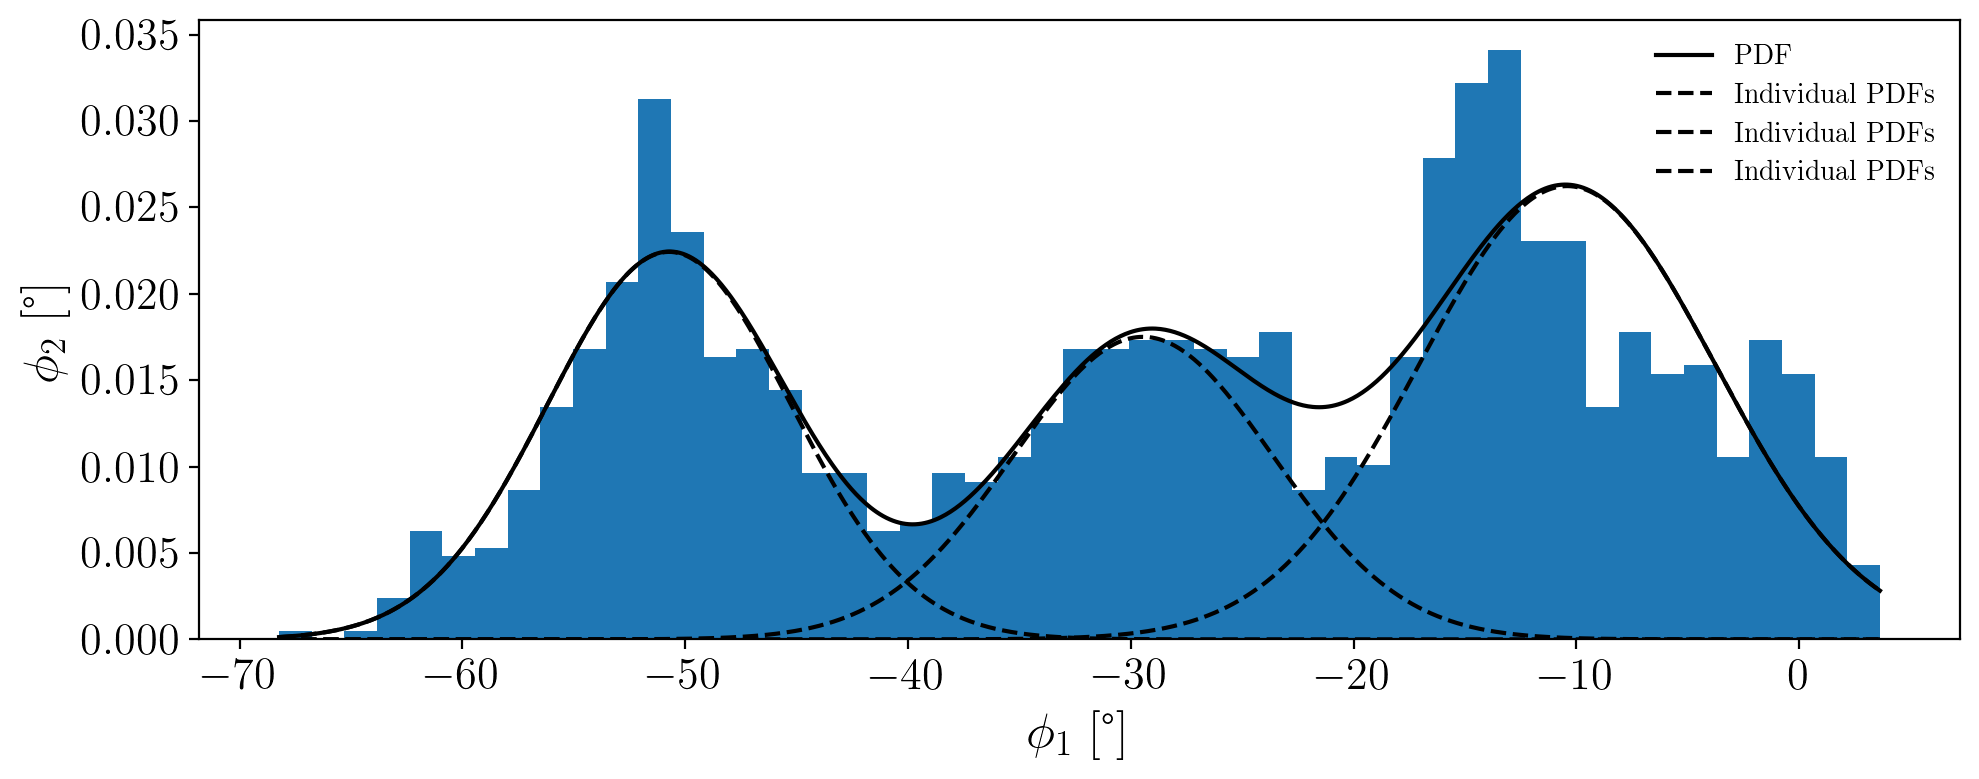

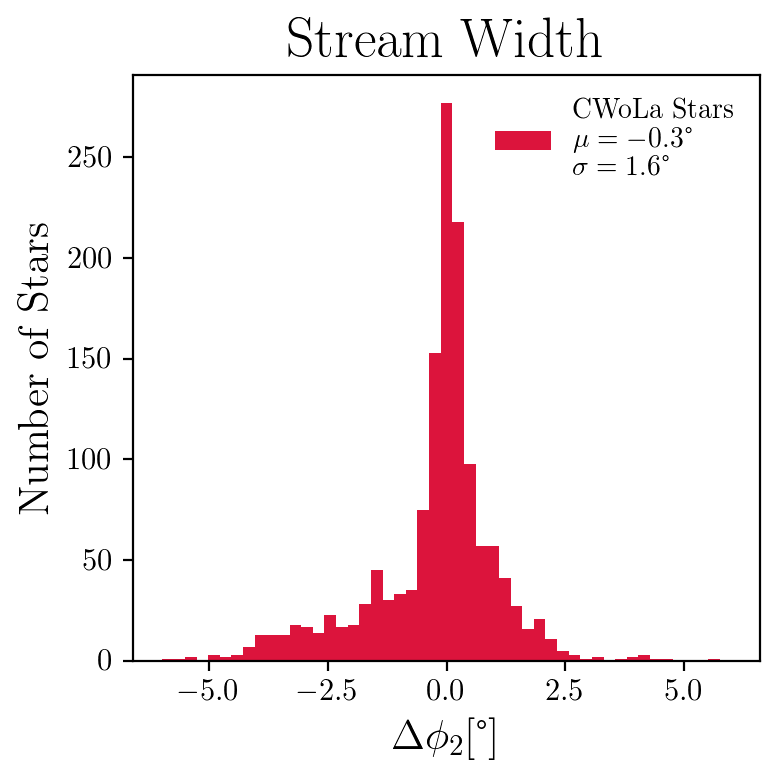

In [110]:
import matplotlib

n_bins = 30
bin_edges = np.linspace(all_cwola_stars['ϕ1'].min(),all_cwola_stars['ϕ1'].max(),n_bins)
print(bin_edges)
medians = []
stds = []
dfs = []

for i in range(len(bin_edges)-1):
    bin_min, bin_max = bin_edges[i], bin_edges[i+1]
    phi_bin = all_cwola_stars[(bin_min <= all_cwola_stars['ϕ1']) & (all_cwola_stars['ϕ1'] <= bin_max)].copy()
    medians.append(np.median(phi_bin['ϕ2']))
    stds.append(np.std(phi_bin['ϕ2']))
    phi_bin['ϕ2'] -= np.median(phi_bin['ϕ2'])
    dfs.append(phi_bin)
df = pd.concat(dfs)

markersize = 5
x = np.histogram(all_cwola_stars['ϕ1'], bins=n_bins-2)[1]
plt.figure(dpi=200, figsize=(10,4))
plt.scatter(all_cwola_stars['ϕ1'], all_cwola_stars['ϕ2'], marker='.', s=markersize, color="crimson", label="CWoLa")
plt.plot(x, medians, color='blue', alpha=1)
plt.hlines(y=0, xmin=bin_edges[0], xmax=bin_edges[-1], linestyle='dashed', color='k')
plt.fill_between(x, np.array(medians), np.array(medians) - 0.5*np.array(stds), color='crimson', alpha=0.5)
plt.fill_between(x, np.array(medians), np.array(medians) + 0.5*np.array(stds), color='crimson', alpha=0.5)
plt.plot(x, medians, color='blue', alpha=1, linewidth=2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(-5,5);
plt.xlim(bin_edges[0],bin_edges[-1]);
plt.xlabel(r"$\phi_1$ [\textdegree]", fontsize=18);
plt.ylabel(r"$\phi_2$ [\textdegree]", fontsize=18);

plt.figure(dpi=200, figsize=(10,4), tight_layout=True)
# H, bins_x, bins_y = np.histogram2d(all_cwola_stars['ϕ1'], all_cwola_stars['ϕ2'], bins=[np.linspace(all_cwola_stars['ϕ1'].min(),all_cwola_stars['ϕ1'].max(),100),np.linspace(-5,5,25)])#, #marker='.', s=markersize, color="crimson", label="CWoLa")
import copy
my_cmap = copy.copy(matplotlib.cm.get_cmap('viridis')) # copy the default cmap
my_cmap.set_bad((0.267004, 0.004874, 0.329415))
plt.hist2d(all_cwola_stars['ϕ1'], all_cwola_stars['ϕ2'], 
           bins=[np.linspace(all_cwola_stars['ϕ1'].min(),all_cwola_stars['ϕ1'].max(),40),np.linspace(-5,2,25)], 
#            bins=[np.linspace(-55,-10,30),np.linspace(-0.8,0.8,20)], 
           norm=matplotlib.colors.LogNorm(), 
          cmap=my_cmap)#, #marker='.', s=markersize, color="crimson", label="CWoLa")
plt.plot(np.linspace(all_cwola_stars['ϕ1'].min(),all_cwola_stars['ϕ1'].max(),100), np.zeros(100), color="white", linestyle="dashed")
plt.plot(x, medians, color='crimson', alpha=1, linewidth=2, label=r"Median $\phi_2$")
plt.fill_between(x, np.array(medians), np.array(medians) - 0.5*np.array(stds), color='white', alpha=0.5)
plt.fill_between(x, np.array(medians), np.array(medians) + 0.5*np.array(stds), color='white', alpha=0.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(frameon=False, labelcolor='white', fontsize=16)
plt.xlabel(r"$\phi_1$ [\textdegree]", fontsize=18);
plt.ylabel(r"$\phi_2$ [\textdegree]", fontsize=18);
# plt.savefig("../plots/cwola_hist_median.pdf")

import matplotlib.colors as mcolors
plt.figure(dpi=200, figsize=(10,4), tight_layout=True)
plt.hist2d(df['ϕ1'], df['ϕ2'], bins=[np.linspace(all_cwola_stars['ϕ1'].min(),all_cwola_stars['ϕ1'].max(),50),
                                     np.linspace(-5,2,25)], density=False)#, #marker='.', s=markersize, color="crimson", label="CWoLa")
plt.plot(np.linspace(all_cwola_stars['ϕ1'].min(),all_cwola_stars['ϕ1'].max(),100), np.zeros(100), color="white", linestyle="dashed")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r"$\phi_1$ [\textdegree]", fontsize=18);
plt.ylabel(r"$\phi_2$ [\textdegree]", fontsize=18);

plt.figure(dpi=200, figsize=(10,4), tight_layout=True)
plt.hist(df['ϕ1'], bins=np.linspace(all_cwola_stars['ϕ1'].min(),all_cwola_stars['ϕ1'].max(),50), density=True)#, #marker='.', s=markersize, color="crimson", label="CWoLa")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r"$\phi_1$ [\textdegree]", fontsize=18);
plt.ylabel(r"$\phi_2$ [\textdegree]", fontsize=18);
X = np.array(df['ϕ1']).reshape(-1, 1)
gmm = GaussianMixture(3).fit(X)
print(gmm.means_)
x = np.linspace(all_cwola_stars['ϕ1'].min(),all_cwola_stars['ϕ1'].max(), 1000)
logprob = gmm.score_samples(x.reshape(-1, 1))
responsibilities = gmm.predict_proba(x.reshape(-1, 1))
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]
plt.plot(x, pdf, '-k', label="PDF")
plt.plot(x, pdf_individual, '--k', label="Individual PDFs")
plt.legend(frameon=False, fontsize=10)

plt.figure(dpi=200, figsize=(4,4), tight_layout=True)
plt.hist(df['ϕ2'], bins=np.linspace(-6,6,50), color='crimson', label=r"CWoLa Stars"+"\n"+r"$\mu = {:.1f}$\textdegree".format(df['ϕ2'].mean())+"\n"+r"$\sigma={:.1f}$\textdegree".format(df['ϕ2'].std()))
plt.xlabel(r'$\Delta\phi_2$[\textdegree]',fontsize=15)
print(np.mean(df['ϕ2']))
print(np.std(df['ϕ2']))
plt.title("Stream Width",fontsize=20)
plt.ylabel("Number of Stars", fontsize=15)
plt.legend(frameon=False, fontsize=10);
# plt.savefig("../plots/stream_width.pdf")

# Figure 8

In [111]:
labeled = all_cwola_stars[all_cwola_stars.stream]
unlabeled = all_cwola_stars[all_cwola_stars.stream == False]

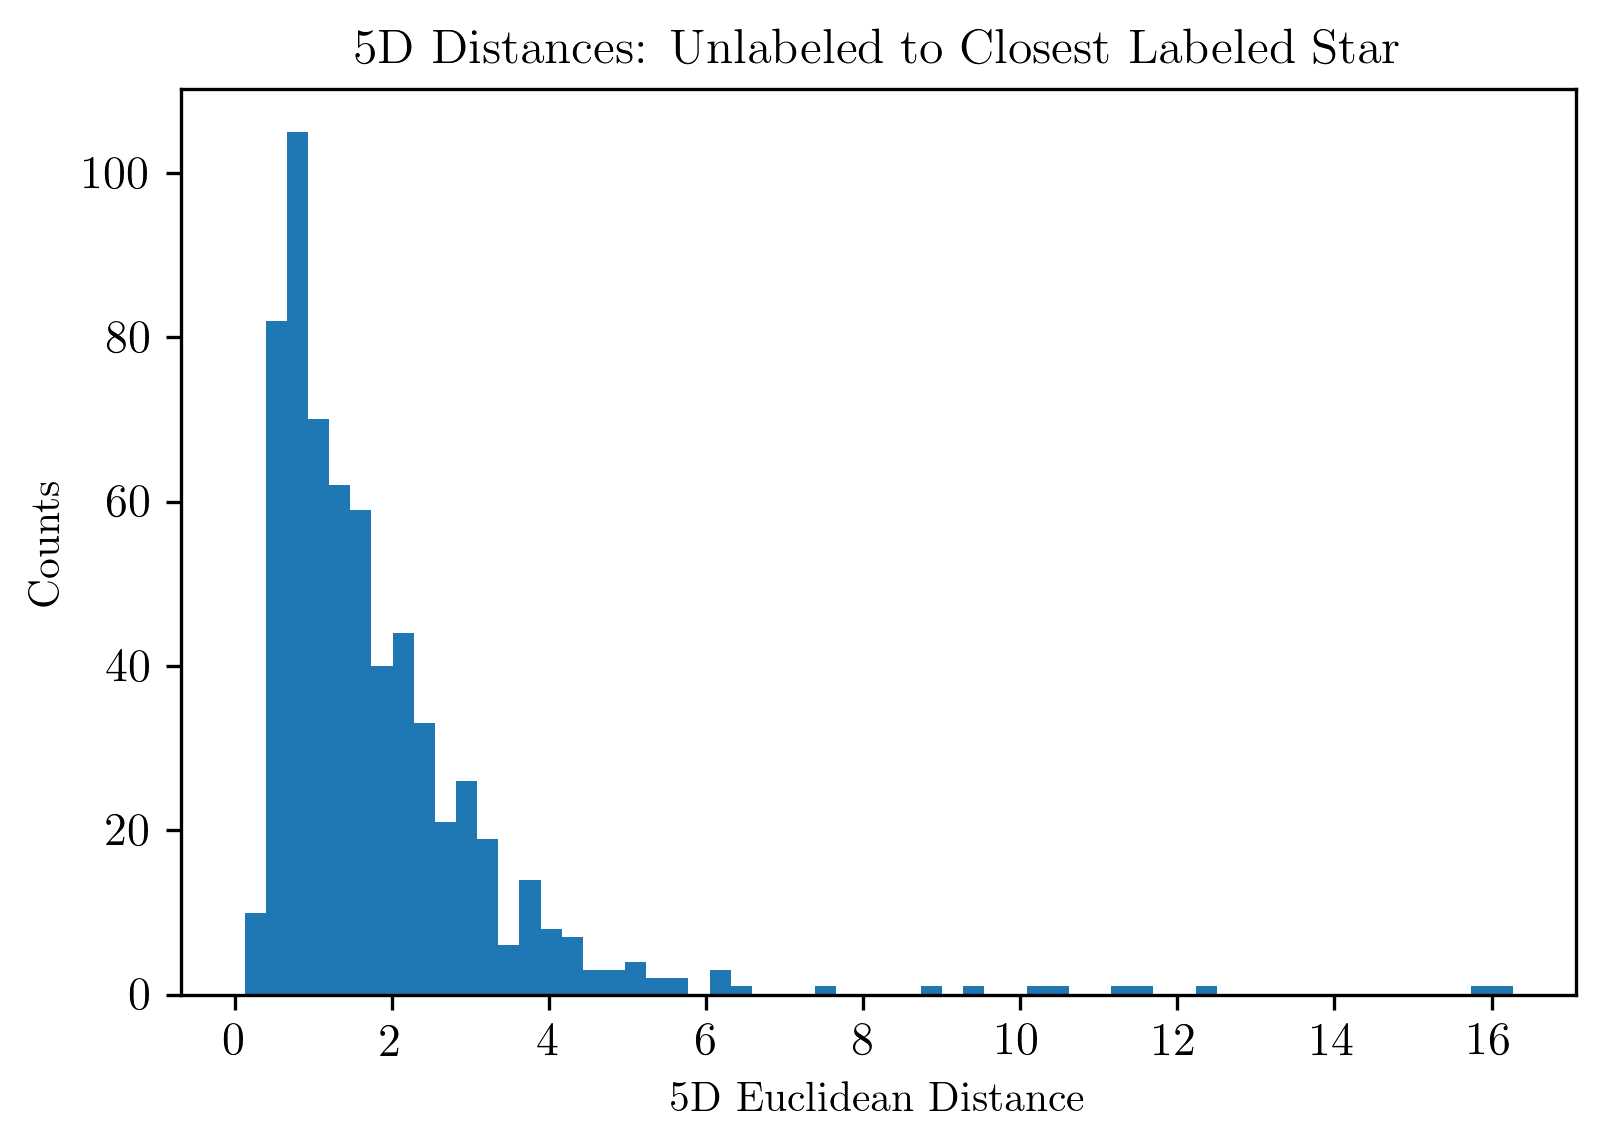

In [112]:
from scipy.spatial import distance_matrix
cols = ["μ_ϕcosλ", "δ", "α", "b-r", "g"]
dists = distance_matrix(labeled[cols].to_numpy(), unlabeled[cols].to_numpy())
closest_labeled = labeled.iloc[dists.argmin(axis=0)]
deltas = unlabeled[cols].to_numpy()-closest_labeled[cols].to_numpy()
distances = np.sqrt(np.sum(deltas**2, axis=1))
unlabeled['5d_distance'] = distances

plt.figure(dpi=300)
plt.hist(unlabeled["5d_distance"], bins=60)
plt.title("5D Distances: Unlabeled to Closest Labeled Star");
plt.ylabel("Counts")
plt.xlabel("5D Euclidean Distance");
# plt.savefig("../plots/5d_distance.png")

In [113]:
# promising = unlabeled[(unlabeled['5d_distance'] < 1)] # restrict by a specific distance
promising = unlabeled[(unlabeled['5d_distance'] < unlabeled['5d_distance'].quantile(0.1))] # restrict to the top x%

In [114]:
len(promising)

64

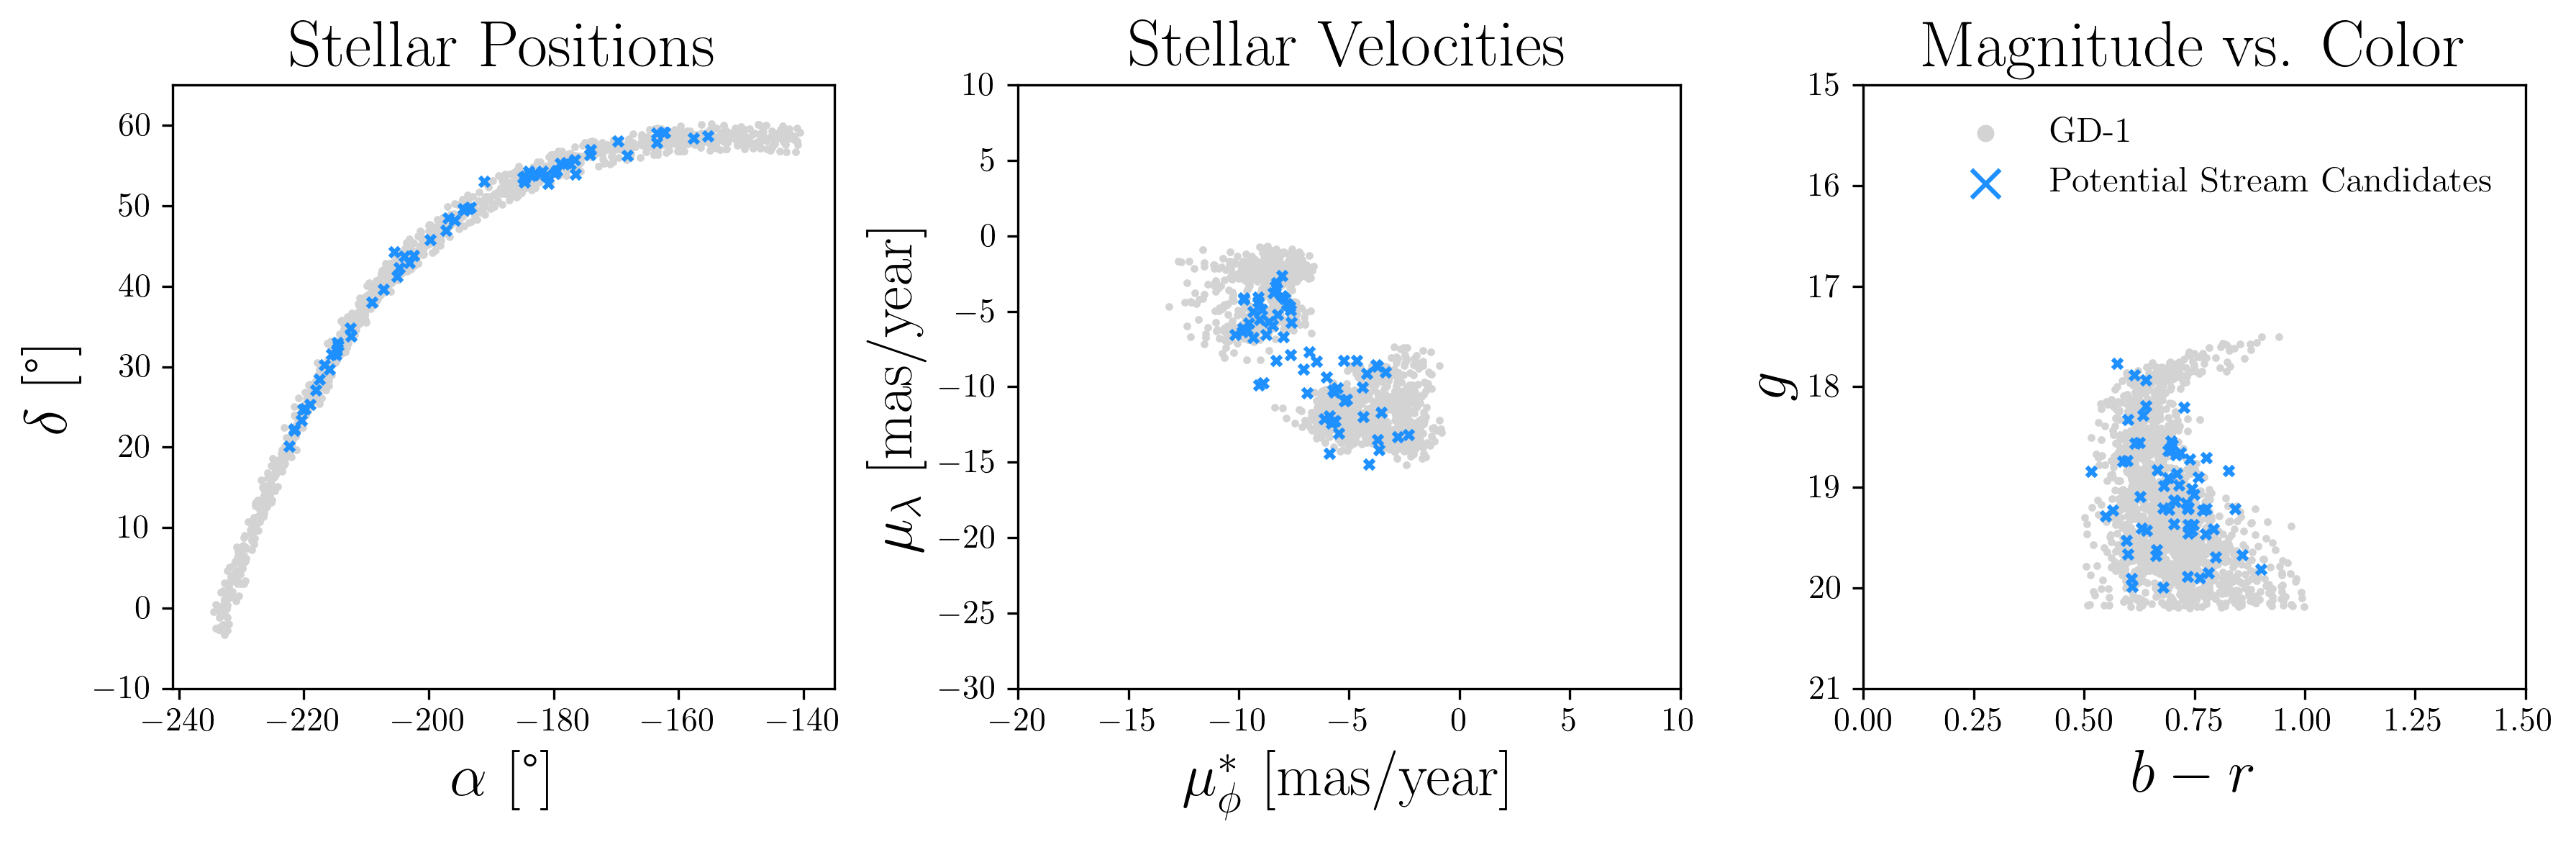

In [115]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(12,4), dpi=300, tight_layout=True)

markersize=10

ax = axs[0]
ax.set_title("Stellar Positions", fontsize=22)
ax.scatter(all_gd1_stars.α_wrapped - 360, all_gd1_stars.δ, color = "lightgray", marker='.', s=markersize, label="GD-1")
# ax.scatter(labeled.α_wrapped - 360, labeled.δ, marker='.', color="crimson",s=markersize, label="CWoLa-Identified GD-1 Matches")
ax.scatter(promising.α_wrapped - 360, promising.δ, marker='x', color="dodgerblue", s=markersize, label="Potential Stream Candidates")
ax.set_xlim(-241,-135);
ax.set_ylim(-10,65);
ax.set_xlabel(r"$\alpha$ [\textdegree]", fontsize=20)
ax.set_ylabel(r"$\delta$ [\textdegree]", fontsize=20);

ax = axs[1]
ax.set_title("Stellar Velocities", fontsize=22)
ax.scatter(all_gd1_stars['μ_ϕcosλ'], all_gd1_stars.μ_λ,  s=markersize, color = "lightgray", marker='.', label="GD-1")
# ax.scatter(labeled['μ_ϕcosλ'], labeled.μ_λ, marker='.', s=markersize, color="crimson", label="CWoLa-Identified GD-1 Matches")
ax.scatter(promising['μ_ϕcosλ'], promising.μ_λ, marker='x', s=markersize, color="dodgerblue", label="Potential Stream Candidates")
ax.set_xlim(-20,10);
ax.set_ylim(-30,10);
ax.set_xlabel(r"$\mu_{\phi}^*$ [mas/year]", fontsize=20)
ax.set_ylabel(r"$\mu_{\lambda}$ [mas/year]", fontsize=20);

ax = axs[2]
ax.set_title("Magnitude vs. Color", fontsize=22)
ax.scatter(all_gd1_stars['b-r'], all_gd1_stars.g, s=markersize, color = "lightgray", marker='.', label="GD-1")
# ax.scatter(labeled['b-r'], labeled.g, marker='.', s=markersize, color="crimson", alpha=1, label="CWoLa-Identified GD-1 Matches")
ax.scatter(promising['b-r'], promising.g, marker='x', s=markersize, color="dodgerblue", label="Potential Stream Candidates")
ax.set_xlabel(r"$b-r$", fontsize=20)
ax.set_ylabel(r"$g$", fontsize=20);
ax.set_xlim(0,1.5);
ax.set_ylim(15,21);
ax.invert_yaxis();
ax.legend(frameon=False, fontsize=12, markerscale=3)

# plt.savefig("../plots/promising_triptych.pdf")

# Figure 9

In [ ]:
df = pd.read_hdf('../gaia_data/df_bump.h5')

cuts = [0.,0.5,0.9,0.99, 0.999]
plt.figure(figsize = (10, 10), dpi = 300)
bins = np.linspace(-30, 10, 40)

l1 = plt.axvspan(-13.6, -11.4, alpha=0.5, color='gray', label = 'Signal Region')
l2 = plt.axvspan(-15.9, -9.1, alpha = 0.5, color = 'lightgray', label = 'Sideband Region')
plt.xlabel(r'$\mu_\lambda$ [mas/year]', fontsize = 24)
plt.ylabel('Number of Stars', fontsize = 24)
plt.xlim(-30, 10)
plt.ylim([1, 10e5])
plt.yscale('log')
plt.tick_params(labelsize=20)

labels = ['Full Dataset', 'Top 50\%', 'Top 10\%', 'Top 1\%', 'Top 0.1\%']
thresholds = [0.1032368540763855, 0.3231506943702698, 0.3529723048210144, 0.4468141984939546, 0.6058574247360222]
cmap = plt.cm.get_cmap('viridis')
cut_legend = []
for j in range(len(cuts)):
    cut = cuts[j]
    X_pass_all = df[(df["nn_score_avg"] > thresholds[j])]
    l = plt.hist(X_pass_all.μ_λ, bins = bins, color = cmap(0.8 - j/5), alpha = 1, histtype = 'step', label = labels[j], lw = 2)[2][0]
    cut_legend.append(l)
l3 = plt.hist(df[df.stream].μ_λ, bins = bins, label = 'Stream', color = 'Crimson')[2][0]
first_legend = plt.legend(handles = [l1, l2, l3], fontsize = 18, loc = 'upper right', frameon = False)
plt.legend(handles = cut_legend, fontsize = 18, loc = 'upper left', frameon = False)
plt.gca().add_artist(first_legend)
plt.savefig('../plots/scanning_bump.pdf')
plt.show()

In [ ]:
original_df = pd.read_hdf('../gaia_data/df_no_bump.h5')
cuts = [0.,0.5,0.9,0.99, 0.999]

plt.figure(figsize = (10, 10), dpi = 300)
bins = np.linspace(-30, 10, 40)
l1 = plt.axvspan(-25, -23, alpha=0.5, color='gray', label = 'Signal Region')
l2 = plt.axvspan(-27, -21, alpha = 0.5, color = 'lightgray', label = 'Sideband Region')

plt.xlabel(r'$\mu_\lambda$ [mas/year]', fontsize = 24)
plt.ylabel('Number of Stars', fontsize = 24)
plt.xlim(-30, 10)
plt.ylim([1, 10e5])
plt.tick_params(labelsize=20)
plt.yscale('log')

labels = ['Full Dataset', 'Top 50\%', 'Top 10\%', 'Top 1\%', 'Top 0.1\%']
thresholds = [0.20768135786056519, 0.33279335498809814, 0.37433197498321535, 0.406723210811615, 0.42202900934219356]
cmap = plt.cm.get_cmap('viridis')
cut_legend = []
for j in range(len(cuts)):
    cut = cuts[j]
    X_pass_all = original_df[(original_df["nn_score_avg"] > thresholds[j])]
    l = plt.hist(X_pass_all.μ_λ, bins = bins, color = cmap(0.8 - j/5), alpha = 1, histtype = 'step', label = labels[j], lw = 2)[2][0]
    cut_legend.append(l)
l3 = plt.hist(original_df[original_df.stream].μ_λ, bins = bins, label = 'Stream', color = 'Crimson')[2][0]
first_legend = plt.legend(handles = [l1, l2, l3], fontsize = 18, loc = 'upper right', frameon = False)
plt.legend(handles = cut_legend, fontsize = 18, loc = (0.23, 0.74), frameon = False)
plt.gca().add_artist(first_legend)
plt.savefig('../plots/scanning_no_bump.pdf')
plt.show()

# Figure 10

In [ ]:
file = "../gaia_data/mock_streams/gaiamock_ra156.2_dec57.5_stream_feh-1.6_v3_863.npy"
df = pd.DataFrame(np.load(file), columns = ["μ_δ", "μ_α", "δ", "α", "b-r", "g", "ϕ", "λ", "μ_ϕcosλ", "μ_λ", 'stream'])
df['α_wrapped'] = df['α'].apply(lambda x: x if x > 100 else x + 360)
df['stream'] = df['stream']/100
df['stream'] = df['stream'].astype(bool)

save_folder = "../plots/mock"

if save_folder is not None: 
    os.makedirs(save_folder, exist_ok=True)

make_plots(df, save_folder = save_folder)
df_slice = signal_sideband(df, save_folder = save_folder, sr_factor=0.25, sb_factor=0.5)

In [ ]:
test = pd.read_hdf("mock/df_test.h5")
n_top_stars = 250
top_stars = test.sort_values('nn_score',ascending=False)[:n_top_stars]
n_perfect_matches = top_stars.stream.value_counts()[True] 
n_perfect_matches/len(top_stars)*100

plt.figure(figsize=(5,5), dpi=300, tight_layout=True) 
plt.title('Top {} Stars'.format(n_top_stars), fontsize=25)
if "stream" in test.keys():
    stream_stars_in_test_set = test[test.stream == True]
    plt.scatter(stream_stars_in_test_set.α_wrapped - 360, stream_stars_in_test_set.δ, marker='.', 
            color = "lightgray",
            label='Stream')
#     plt.scatter(top_stars.α_wrapped - 360, top_stars.δ, marker='.', 
#             color = "lightpink",
#             label="CWoLa Top Stars\n(Purity = {:.0f}\%)".format(n_perfect_matches/len(top_stars)*100))
    if True in top_stars.stream.unique(): 
        plt.scatter(top_stars[top_stars.stream].α_wrapped - 360, top_stars[top_stars.stream].δ, marker='.', 
                color = "crimson",
                label="CWoLa Top Stars\n(Purity = {:.0f}\%)".format(n_perfect_matches/len(top_stars)*100))
else:
    plt.scatter(top_stars.α_wrapped - 360, top_stars.δ, marker='.', 
            color = "crimson",
            label="CWoLa Top Stars") 
plt.legend(
#     bbox_to_anchor=(1.1, 1), 
    loc='upper left', markerscale=2,
    frameon=False, fontsize=16)
plt.xlim(test.α_wrapped.min() - 360,test.α_wrapped.max()- 360)
plt.ylim(test.δ.min(),test.δ.max())
plt.xlabel(r"$\alpha$ [\textdegree]", fontsize=20)
plt.ylabel(r"$\delta$ [\textdegree]", fontsize=20)
plt.savefig("../plots/mock_top_250.pdf")

Across 100 streams...

In [ ]:
top_stars = test[(test['nn_score'] >= test['nn_score'].quantile((100-25)/100))]

In [ ]:
top_stars

In [ ]:
files = glob("../trained_models/mocks/*/df_test.h5")
n_top_stars = 250
mock_purities = []

plt.figure(dpi=300, figsize=(5,5), tight_layout=True)

for file in tqdm(files):
    test = pd.read_hdf(file)
    top_stars = test.sort_values('nn_score',ascending=False)[:n_top_stars]
    try: 
        n_perfect_matches = top_stars.stream.value_counts()[True] 
    except:
        n_perfect_matches = 0
    purity = n_perfect_matches/len(top_stars)*100
    mock_purities.append(purity)
    
    # Scan for optimal percentage
    cuts = np.linspace(0.01, 25, 100)
#     top_cuts = np.arange(50, 500, 50)
    top_cuts = [10, 500, 5000, 50000]
    efficiencies = []
    purities = []
#     for x in cuts:
#         top_stars = test[(test['nn_score'] >= test['nn_score'].quantile((100-x)/100))]
    for n in top_cuts:
        top_stars = test.sort_values('nn_score',ascending=False)[:n]
        if True in top_stars.stream.unique():
            n_perfect_matches = top_stars.stream.value_counts()[True]
            stream_stars_in_test_set = test[test.stream == True]
            efficiencies.append(100*n_perfect_matches/len(stream_stars_in_test_set))
            purities.append(n_perfect_matches/len(top_stars)*100)
        else:
            efficiencies.append(np.nan)
            purities.append(np.nan)
            
#     if(purities[-1] > 50):
#         print(file)

    ### Choose a cut to optimize purity
    if not np.isnan(purities).all():
#         print("Maximum purity of {:.1f}% at {:.2f}%".format(np.nanmax(purities),cuts[np.nanargmax(purities)]))
#         cut = cuts[np.nanargmax(purities)]
        plt.plot(top_cuts, purities, label="Signal Purity", color="gray", alpha=0.5)
        plt.xlabel(r"Percentile of NN Scores", fontsize=16)
        plt.ylabel("Percent of Top Stars in Stream", fontsize=16);
    #     plt.legend()    
#     plt.savefig('../plots/mock/purities.pdf')

In [ ]:
len([purity for purity in mock_purities if purity > 0])

In [ ]:
len([purity for purity in mock_purities if purity > 50])

In [ ]:
100*66/96

In [ ]:
np.median(mock_purities)

In [ ]:
np.mean(mock_purities)

In [ ]:
plt.figure(dpi=300, figsize=(5,5), tight_layout=True)
plt.hist(mock_purities, bins=25, color='crimson')
plt.xlabel("Purity [\%]", fontsize=20);
plt.ylabel("Number of Mock Streams", fontsize=20)
plt.title("Mock Stream Purities", fontsize=25);
plt.savefig('../plots/mock/purities_hist.pdf')

In [ ]:
mask = np.array(mock_purities) < 10

In [ ]:
mask

In [ ]:
from itertools import compress
print(list(compress(mock_purities, mask)))
print(list(compress(files, mask)))

In [ ]:
first_pass_purities = [98, 94, 96, 100, 0, 98, 36, 82, 40, 0, 100, 0, 86, 0, 98, 74, 100, 0, 0, 70, 86, 86, 0, 100, 0, 92, 10, 0, 12, 10, 86, 0, 0, 0, 94, 96, 56, 44, 42, 64, 100, 82, 56, 0, 96, 98, 100, 90, 100, 88, 100, 88, 34, 94, 100, 10, 82, 0, 66, 86, 100, 0, 78, 57, 2, 98, 100, 72, 0, 14, 0, 0, 14, 56, 48, 100, 0, 4, 70, 14, 84, 76, 0, 54, 6, 88, 74, 44, 84, 82, 88, 98, 8, 100, 78, 0, 2, 0, 0, 0,]

In [ ]:
np.mean(first_pass_purities)

In [ ]:
np.median(first_pass_purities)

In [ ]:
len(first_pass_purities)

In [ ]:
len([pur for pur in np.array(first_pass_purities) if pur > 0])

In [ ]:
len([pur for pur in np.array(first_pass_purities) if pur > 50])

In [ ]:
57/76